<a href="https://colab.research.google.com/github/Mephistoe/Bike-Sharing-Demand-Prediction/blob/main/ML_Regression_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -




##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**            Rohit Kumar



# **Project Summary -**

Bike Demand Prediction Using Machine Learning

Demand prediction for bicycles utilizing machine learning is a pivotal initiative for companies within the bike rental sector. Accurate prediction of bicycle demand can greatly enhance inventory management, pricing strategies, and overall operational efficiency. This endeavor focuses on utilizing supervised machine learning techniques to construct a regression model that forecasts bicycle demand within a particular timeframe.

The dataset employed in this initiative consists of rental information garnered from a bike-sharing company. It encompasses particulars such as the count of bicycles rented, rental timestamps, diverse weather conditions, and seasonal fluctuations. Furthermore, the dataset encompasses relevant elements like holidays and workdays, which may potentially impact bicycle rental trends.

Prior to the training of the machine learning model, comprehensive data preprocessing and cleaning are carried out to ensure the dataset's quality and coherence. This encompasses addressing missing values, encoding categorical variables, and scaling numerical attributes, among other preprocessing stages. Subsequent to the preparation of the data, it is partitioned into training and testing sets. The training set is utilized to educate the machine learning model, while the testing set is set aside to assess its performance on unobserved data.

Numerous machine learning algorithms and model architectures are explored during the model development phase. Various hyperparameter configurations are tested to refine the model's performance. Techniques such as cross-validation are employed to evaluate the model's resilience and generalization capability. Following extensive experimentation, the most efficient model is chosen based on its performance on the test set.

In order to assess the model's performance, an array of metrics are utilized, encompassing mean absolute error, root mean squared error, and R-squared. These metrics provide insights into the model's precision and capacity to capture the underlying trends in the data. In this initiative, the selected model demonstrates high precision, as indicated by an impressive R-squared value of 0.88 and a mean absolute error of merely 2.58.

Alongside assessing the comprehensive performance of the model, a series of feature impact investigations are carried out to appraise the influence of individual factors on bicycle demand forecasting. Elements such as temperature, weather conditions, and seasonality are recognized as notable influencers on bicycle demand fluctuations. By grasping the relative significance of these features, businesses can make well-informed choices concerning pricing, marketing, and operational planning.

In conclusion, bicycle demand prediction utilizing machine learning presents valuable insights for businesses in the bicycle rental sector. By precisely forecasting demand and comprehending the factors propelling it, businesses can optimize their operations, enhance customer contentment, and maximize profitability. This initiative highlights the efficacy of supervised machine learning techniques in tackling real-world forecasting hurdles and accentuates the significance of feature analysis in deciphering model predictions.**


# **GitHub Link -**

https://github.com/Mephistoe/Bike-Sharing-Demand-Prediction

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


> My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# ***Let's Begin !***

## ***1. Know Your Data***

## IMPORT LIBRARIES

In [ ]:
# Import Libraries

#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')



##Dataset Loading

In [ ]:
# Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Seoul bike data set from drive
bike_df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [ ]:
# Viewing the top 5 rows of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Viewing the bottom 5 rows of the data
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(bike_df.shape)

(8760, 14)


In [ ]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## Dataset Information

In [ ]:
# Checking details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {bike_df.duplicated().value_counts()},unique values with {len(bike_df[bike_df.duplicated()])} duplication")

Data is duplicated ? False    8760
dtype: int64,unique values with 0 duplication


### Check Unique Values for each variable.

In [ ]:
# Checking unique values for each column.
# bike_df.nunique()
for i in bike_df.columns.tolist():
  print(f"Unique values in {i} is {bike_df[i].nunique()}.")

Unique values in Date is 365.
Unique values in Rented Bike Count is 2166.
Unique values in Hour is 24.
Unique values in Temperature(°C) is 546.
Unique values in Humidity(%) is 90.
Unique values in Wind speed (m/s) is 65.
Unique values in Visibility (10m) is 1789.
Unique values in Dew point temperature(°C) is 556.
Unique values in Solar Radiation (MJ/m2) is 345.
Unique values in Rainfall(mm) is 61.
Unique values in Snowfall (cm) is 51.
Unique values in Seasons is 4.
Unique values in Holiday is 2.
Unique values in Functioning Day is 2.


## Missing Values / Null values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

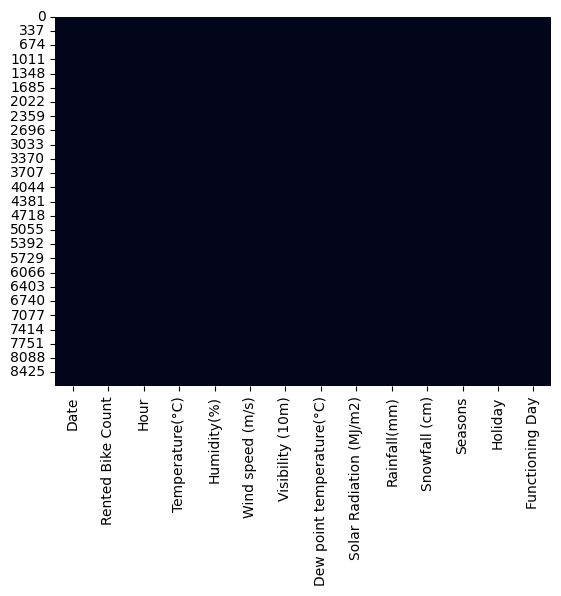

In [ ]:
# Visualizing the missing values
sns.heatmap(bike_df.isnull(), cbar=False);

### What did you know about your dataset?

* The dataset consists of 8760 observations and 14 features.

* Each day consists of 24 hours, and there are 365 days in a year. Therefore, the total number of observations in the dataset is calculated as 365 multiplied by 24, which equals 8760.

* There are no null values present in the dataset.

* All values in the dataset are unique, indicating the absence of duplicates. This absence of duplicates ensures that the data is free from bias, as duplicates can skew results and complicate data summarization in downstream analysis.

* The "Date" column is currently stored as an object data type. To facilitate easier manipulation and analysis, it should be converted to the datetime data type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f'Features: {bike_df.columns.to_list()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [ ]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


##Variables description

**Here's a breakdown of the features in our dataset:**

**Date:** *Represents the date of the day, ranging from 01/12/2017 to 30/11/2018. It is currently formatted as a string (DD/MM/YYYY), and we need to convert it into datetime format.*

**Rented Bike Count:** *Indicates the number of rented bikes per hour, which is our dependent variable that we aim to predict. It is of integer type.*

**Hour:** *Represents the hour of the day in a digital time format, ranging from 0 to 23. It is currently stored as an integer, but we need to convert it into a categorical data type.*

**Temperature(°C):** *Represents the temperature in Celsius. It is of float type.*

**Humidity(%):** *Represents the humidity in the air as a percentage. It is of integer type.*

**Wind speed (m/s):** *Indicates the speed of the wind in meters per second. It is of float type.*

**Visibility (10m):** *Represents visibility in meters. It is of integer type.*

**Dew point temperature(°C):** *Represents the temperature at the beginning of the day in Celsius. It is of float type.*

**Solar Radiation (MJ/m2):** *Represents the sun's contribution in mega joules per square meter. It is of float type.*

**Rainfall(mm):** *Indicates the amount of rainfall in millimeters. It is of float type.*

**Snowfall (cm):** *Indicates the amount of snowfall in centimeters. It is of float type.*

**Seasons:** *Represents the season of the year. It is currently stored as a string, and there are four seasons in the data.*

**Holiday:** *Indicates whether the day is a holiday period or not. It is stored as a string.*

**Functioning Day:** *Indicates whether the day is a functioning day or not. It is stored as a string.*


# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***In real-world datasets, missing values are common, often due to data corruption or recording failures. Handling missing data is crucial during dataset preprocessing, as many machine learning algorithms cannot process missing values. Thus, it's essential to address missing values as a priority in data analysis.***



#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

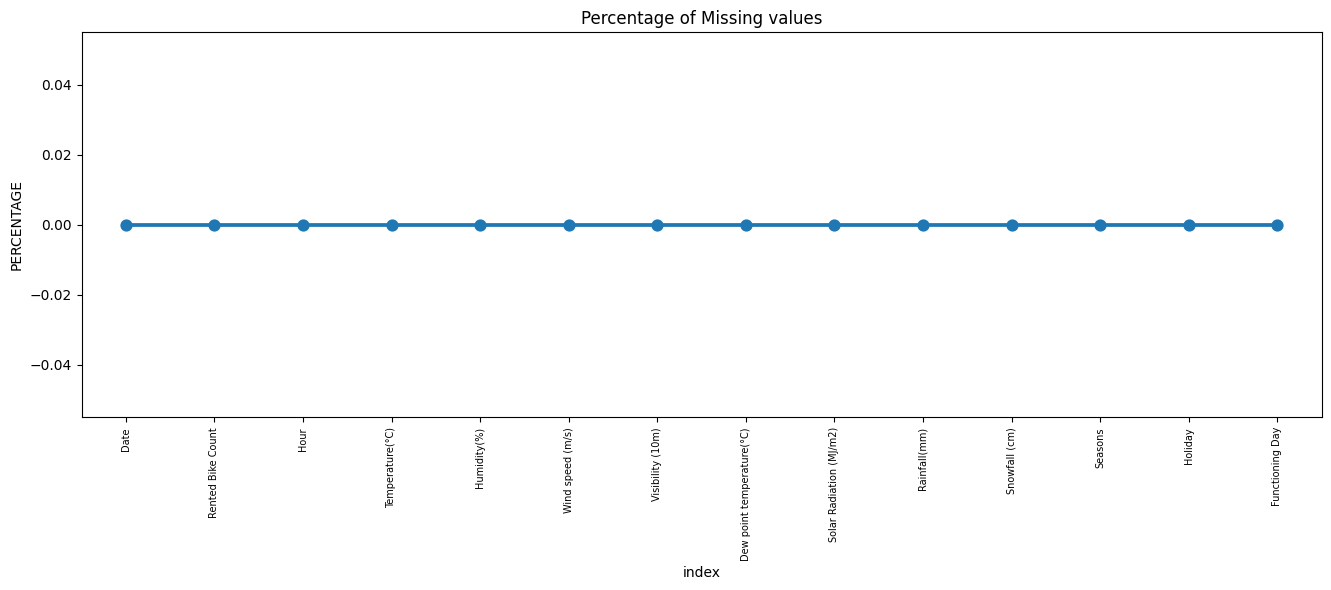

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* ***As observed above, there are fortunately no missing values present in the dataset.***

##Duplicate values

**Why is it important to remove duplicate records from my data?**
* **"Duplication" refers to the presence of repeated data entries within a dataset, which may arise from data entry errors or collection methods. Removing duplicates from the dataset helps save time and resources, as it prevents sending identical communications multiple times to the same recipient**

In [ ]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***Upon examining the data, it was determined that no missing or duplicate values were present. However, certain column names in the dataset were deemed excessively long and cumbersome. Consequently, we opted to replace these with simpler names, ensuring ease of use without altering the final results.***

##Changing column name

In [ ]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

* ***In Python, the "Date" column is initially read as an object type, essentially a string. Since the date column is crucial for analyzing user behavior, it needs to be converted into datetime format. Subsequently, we split it into three columns: 'year', 'month', and 'day', each stored as a category data type. This allows for more efficient analysis and manipulation of date-related information.***




##Breaking date column

In [ ]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].str.replace('-', '/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))




In [ ]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

* ***Firstly, we split the "date" column into three separate columns: "year", "month", and "day".***

* ***Upon examination, we find that the "year" column contains only two unique values, representing the period from December 2017 to November 2018. Given this, we can infer that the year does not provide significant variation and therefore, drop the "year" column.***

* ***Regarding the "day" column, which contains details about each day of the month, we aim to simplify the information to differentiate between weekdays and weekends. Hence, we transform this column accordingly and then drop the original "day" column.***.

In [ ]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

##Changing data type

* ***The "Hour", "month", and "weekdays_weekend" columns are currently displayed as integer data types, but in reality, they should be considered as category data types. Failing to update the data types to reflect their categorical nature could lead to misleading results during further analysis and correlation. Therefore, it's imperative to convert these columns to the correct data type to ensure accurate interpretation and analysis of the data.***

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [ ]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***Exploratory Data Analysis (EDA) involves a comprehensive investigation aimed at revealing the underlying structure of a dataset. This process is crucial for companies as it unveils trends, patterns, and relationships that may not be immediately evident. By conducting EDA, companies gain valuable insights into their data, enabling them to make informed decisions, identify opportunities, and address challenges effectively. EDA forms the foundation for further analysis and modeling, facilitating the development of robust strategies and solutions to drive business growth and success.***

## **Univariate Analysis**

**Why do you do univariate analysis?**
* ***The primary goal of Univariate analysis is to describe individual variables within the dataset and identify patterns or characteristics within each variable. This analysis focuses solely on one variable at a time, allowing for a comprehensive examination of its distribution, central tendency, variability, and other relevant properties. By understanding the characteristics of each variable, Univariate analysis helps uncover patterns and insights that contribute to a deeper understanding of the dataset as a whole. This foundational analysis sets the stage for more complex analyses and modeling techniques, ultimately aiding in data-driven decision-making and problem-solving.***

## **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* ***When analyzing our dependent variable, we're examining a variable whose value is influenced by another variable. In other words, it changes in response to variations in another variable, known as the independent variable. This analysis helps us understand how different factors impact the outcome we're interested in predicting or understanding.***

##**Analysation of categorical variables**

* ***Our dependent variable, "Rented Bike Count," will be analyzed alongside other columns using visualization plots. We'll begin by examining categorical data types before proceeding to analyze numerical data types.***

####Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

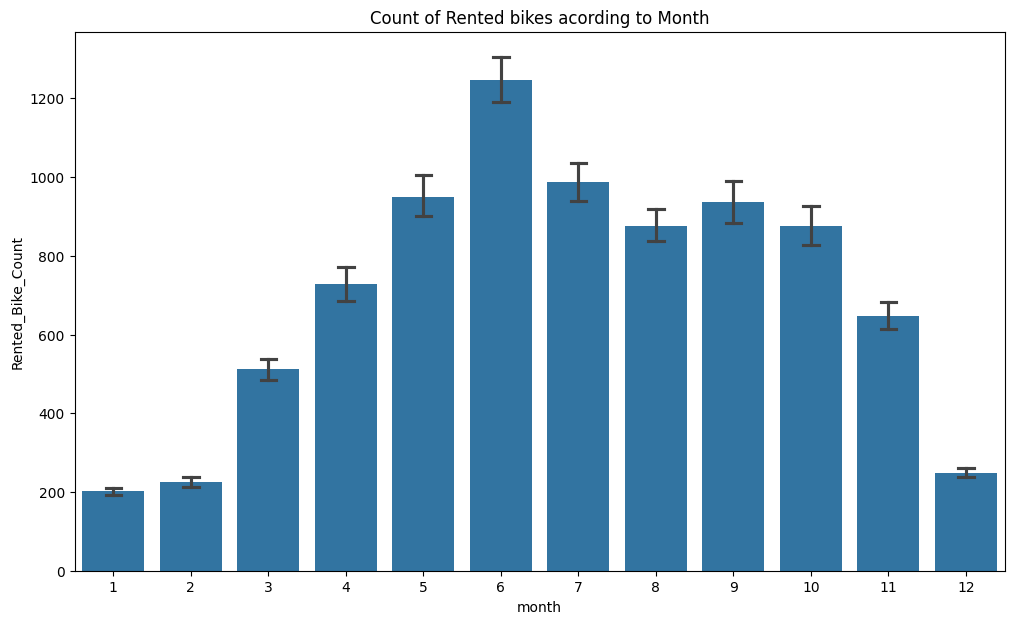

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month')

* ***Based on the bar plot above, it's evident that the demand for rented bikes is notably high during the months from May to October (months 5 to 10), coinciding with the summer season. This observation suggests a strong seasonal pattern, with increased bike rentals during warmer months.***

####weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

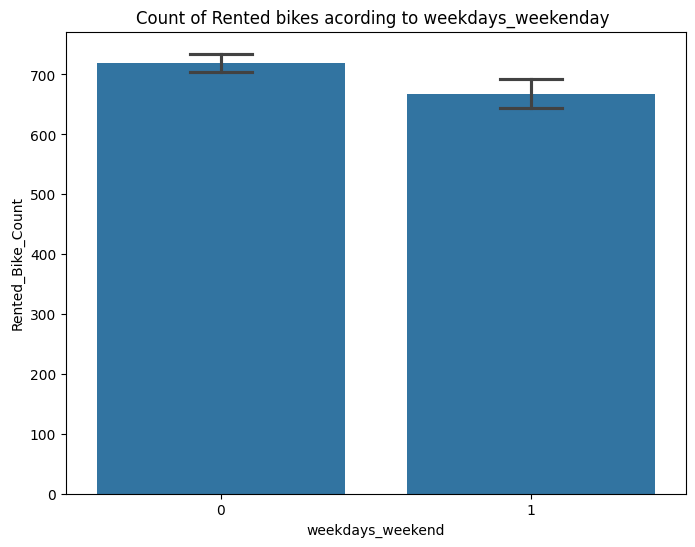

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

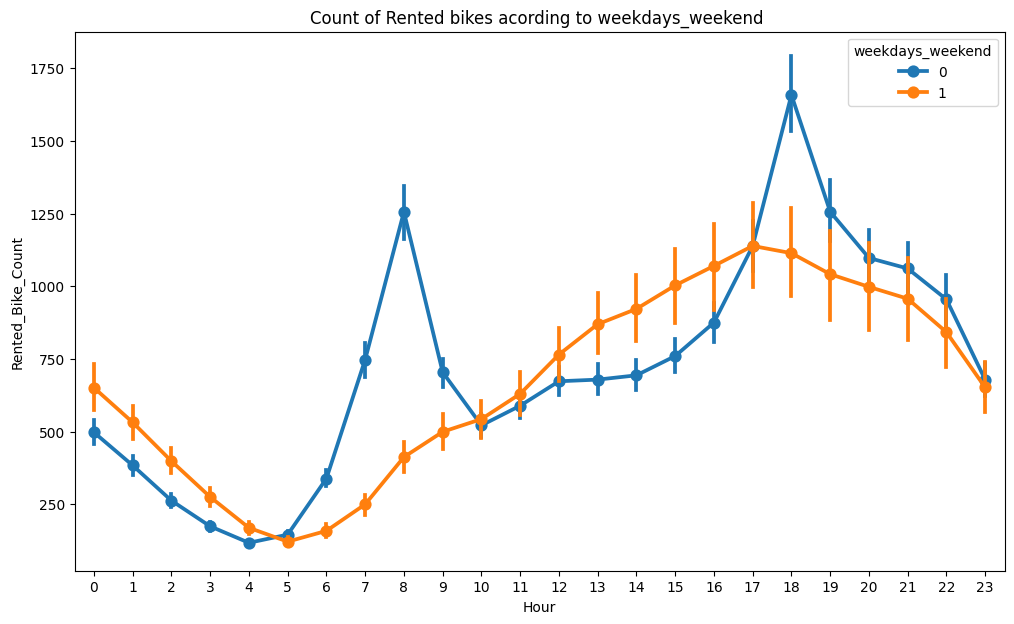

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

* ***Based on the point plot and bar plot above, it's evident that on weekdays (represented in blue), bike demand is higher, likely due to commuting to and from offices. Peak demand occurs during 7 am to 9 am and 5 pm to 7 pm.***

* ***On weekends (represented in orange), bike demand is lower, especially in the morning hours. However, demand slightly increases in the evening, particularly from 4 pm to 8 pm. This pattern suggests a shift in usage towards recreational activities or leisure during weekend evenings.***   

####Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

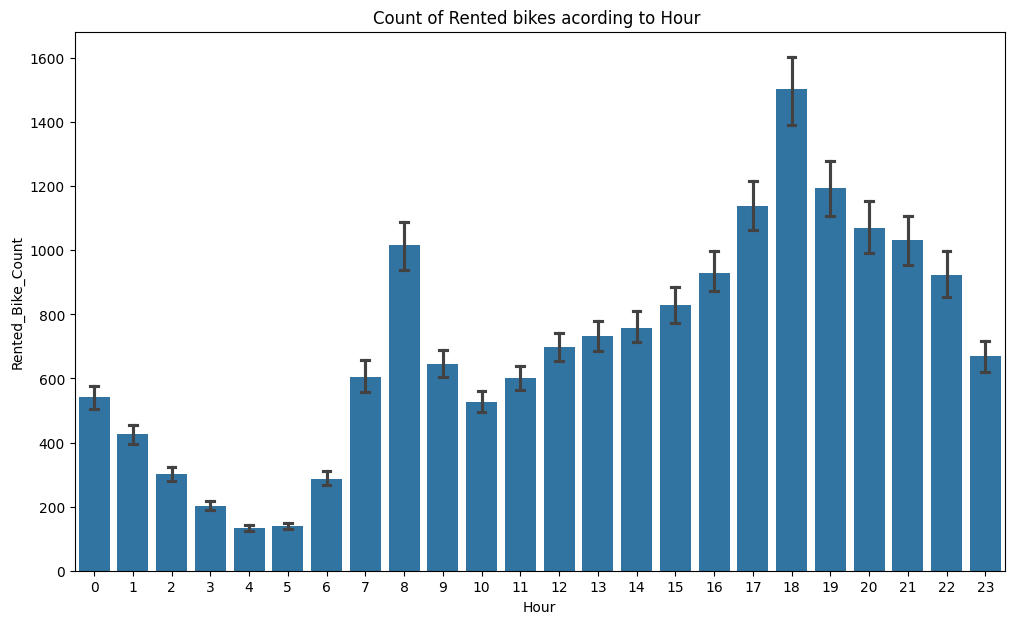

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

* ***The plot above illustrates the usage of rented bikes across different hours throughout the year. A clear trend emerges, indicating that people predominantly utilize rented bikes during their working hours, particularly from 7 am to 9 am and 5 pm to 7 pm. This pattern suggests that bike rentals are commonly associated with commuting to and from work.***   

####Functioning Day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

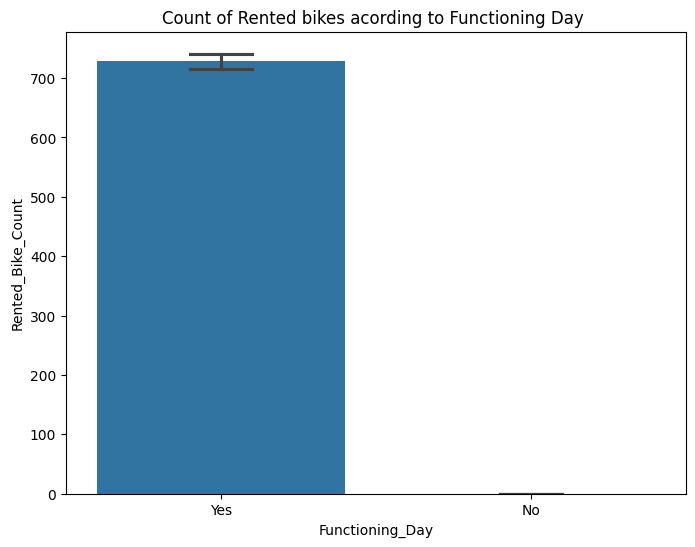

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

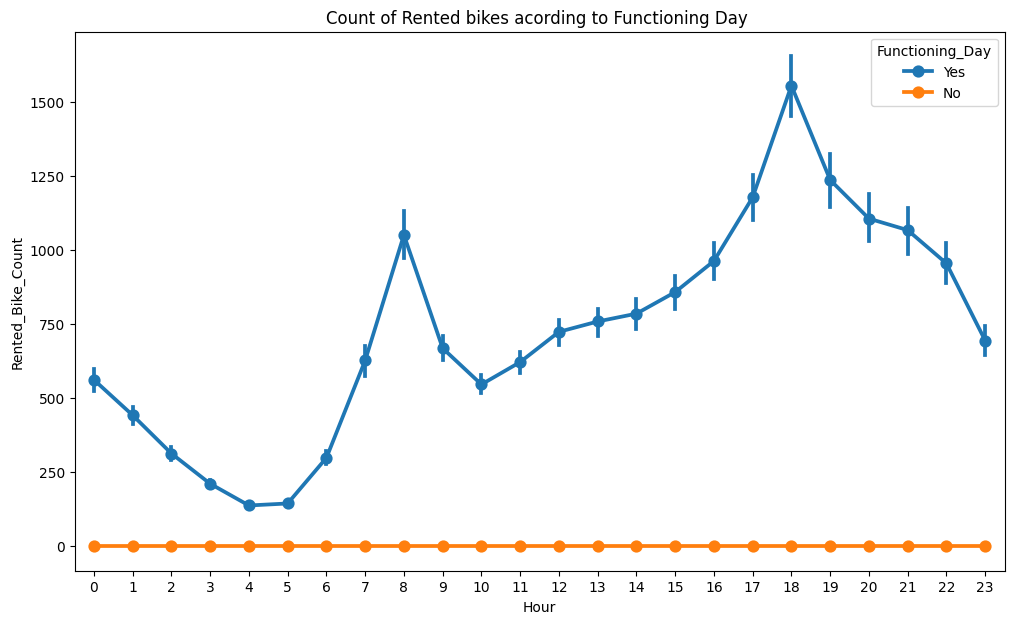

In [ ]:
 #anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

* ***Based on the above bar plot and point plot depicting the usage of rented bikes on functioning and non-functioning days, it's evident that there is minimal to no usage of rented bikes on non-functioning days. This observation suggests that people generally refrain from using rented bikes on days when regular activities or work functions are not taking place.***

####Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

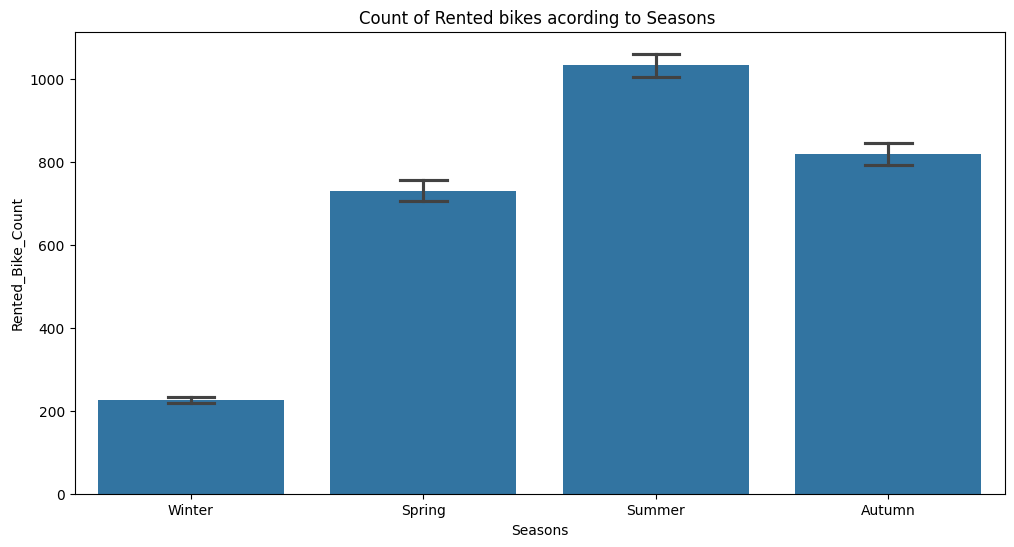

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

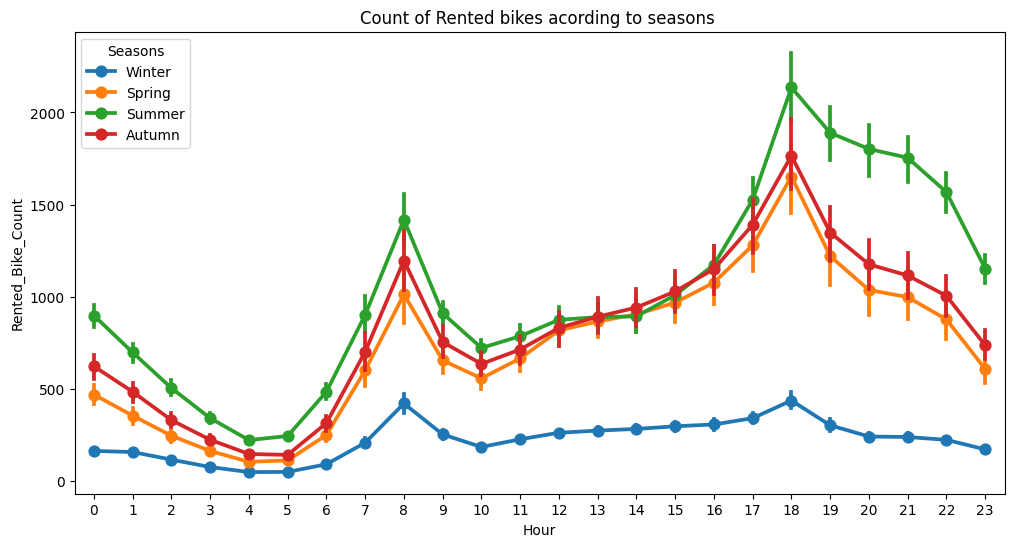

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

* ***Based on the bar plot and point plot above, depicting the usage of rented bikes across four different seasons, it's apparent that the demand for rented bikes is highest during the summer season. This observation aligns with expectations, as warmer weather likely encourages outdoor activities such as biking. Additionally, peak usage occurs during typical commuting hours of 7 am to 9 am and 5 pm to 7 pm.***

* ***Conversely, during the winter season, the usage of rented bikes is notably low. This decrease in demand could be attributed to unfavorable weather conditions such as snowfall, fog, and cold temperatures, which discourage outdoor activities like biking.***

####Holiday


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

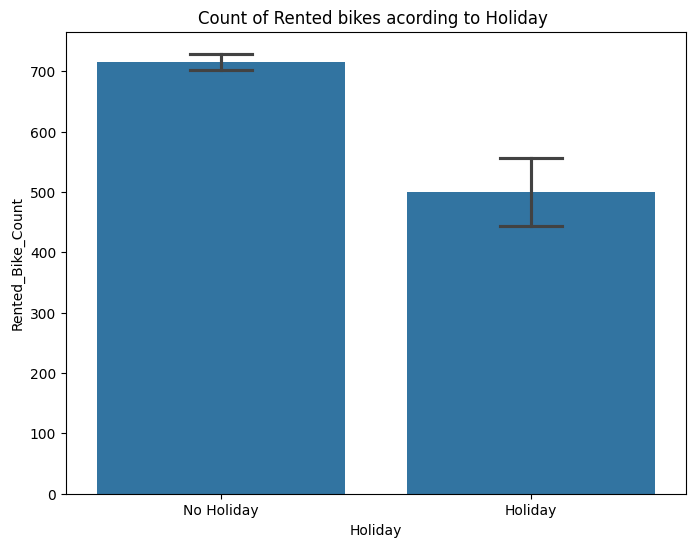

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

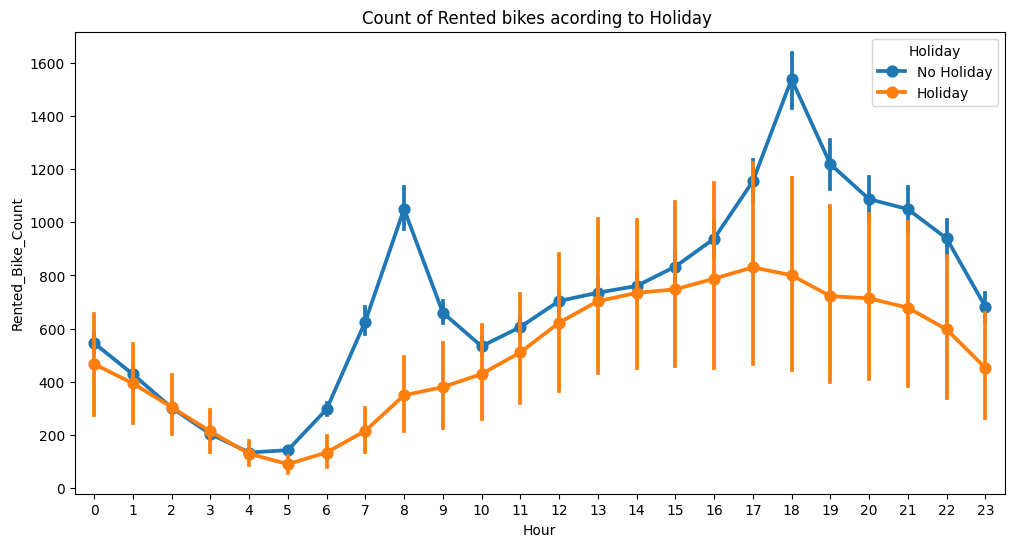

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***Based on the bar plot and point plot above, illustrating the usage of rented bikes during holidays, it's apparent that there is a notable increase in bike usage during holiday periods, particularly from 2 pm to 8 pm. This observation suggests that people are more inclined to use rented bikes for leisure or recreational activities during holiday hours, possibly to explore the city or engage in outdoor pursuits during their free time.***

##**Analyze of Numerical variables**

**What is Numerical Data ?**

* ***Numerical data, a type of quantitative data, is expressed in numerical form rather than natural language description. It is always collected and represented using numbers, allowing for arithmetic operations to be performed on these values. This distinguishes numerical data from other types of data represented in numerical form, as it possesses the capability to conduct mathematical calculations and analyses with the numerical values.***

##<b> Pays little attention to the skewness of our numerical features

In [ ]:
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


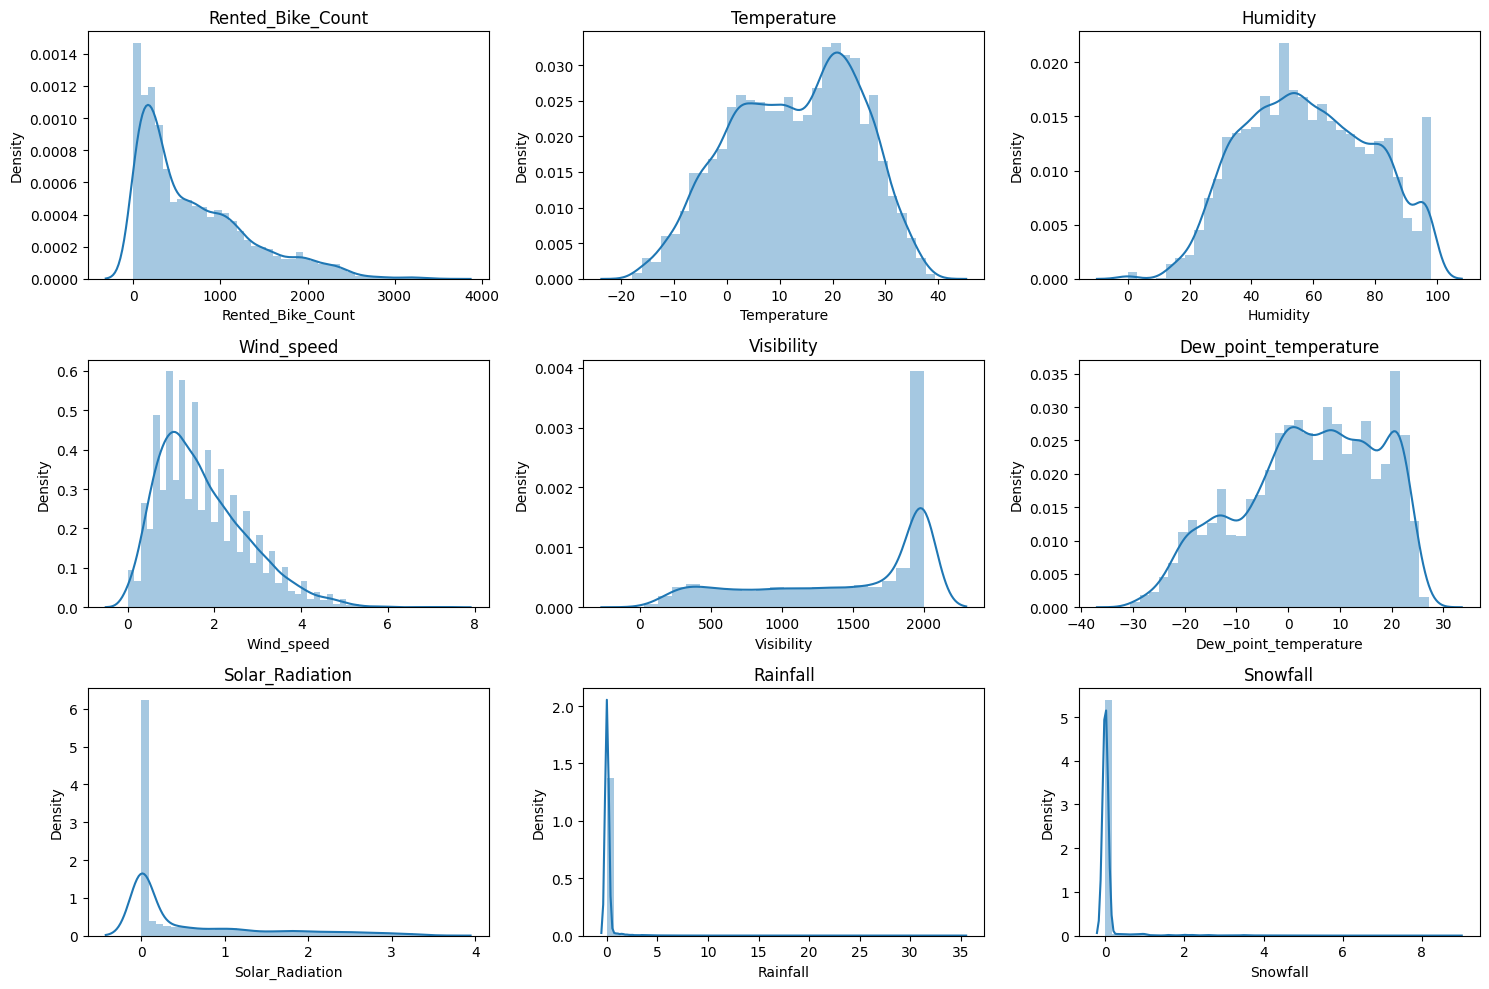

In [ ]:
# printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

## Right skewed columns are
The columns exhibiting a right-skewed distribution are:

Rented Bike Count (Dependent variable)
Wind speed (m/s)
Solar Radiation (MJ/m2)
Rainfall (mm)
Snowfall (cm)
These columns have distributions where the majority of the data points are clustered towards the lower end of the range, with a few extremely high values extending the right tail of the distribution.

## Left skewed columns are
The columns exhibiting a left-skewed distribution are:

Visibility (10m)
Dew point temperature (°C)
In these columns, the majority of the data points are clustered towards the higher end of the range, with a few extremely low values extending the left tail of the distribution.

##<b> Lets try to find how is the relation of numerical features with our dependent variable

## Numerical VS Rented Bike Count

<Axes: xlabel='Temperature'>

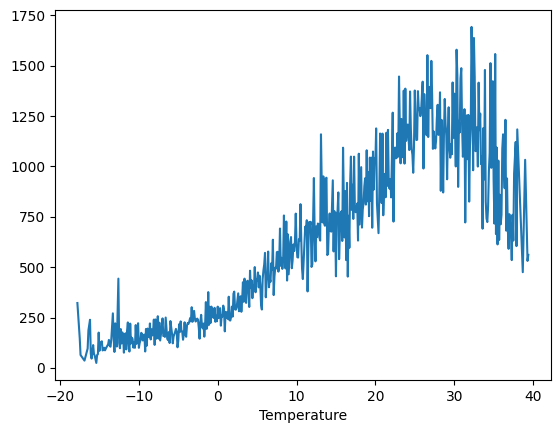

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

* ***Based on the above plot, it's evident that bike rentals tend to increase when the temperature is around 25°C on average. This observation suggests that people are more inclined to ride bikes during warmer weather conditions, with 25°C serving as a favorable temperature for outdoor activities such as biking.***

<Axes: xlabel='Dew_point_temperature'>

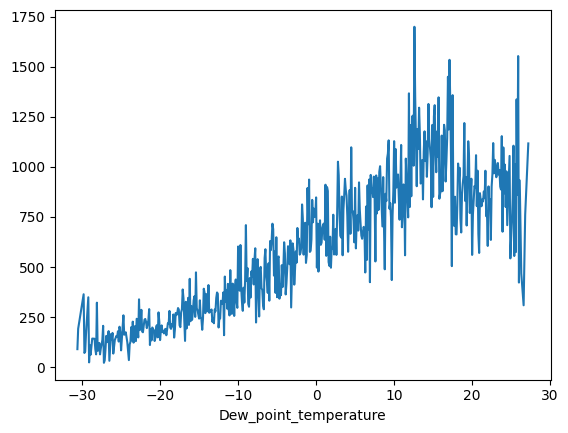

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

* ***From the plot of "Dew_point_temperature," it appears to exhibit a similar pattern to the plot of "Temperature." This observation suggests a potential correlation between these two variables, which we can further investigate in our subsequent analysis.***

<Axes: xlabel='Solar_Radiation'>

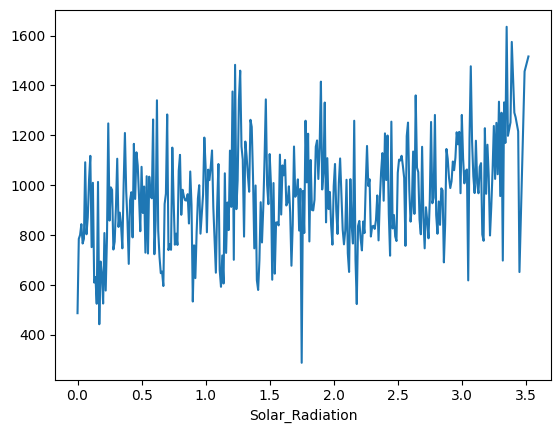

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()


* ***From the above plot, it's evident that the count of rented bikes is substantially higher when there is solar radiation present. Specifically, the count of rents reaches around 1000 when solar radiation is observed. This observation suggests a positive relationship between solar radiation and bike rentals, indicating that people are more likely to rent bikes during periods of increased sunlight.***

<Axes: xlabel='Snowfall'>

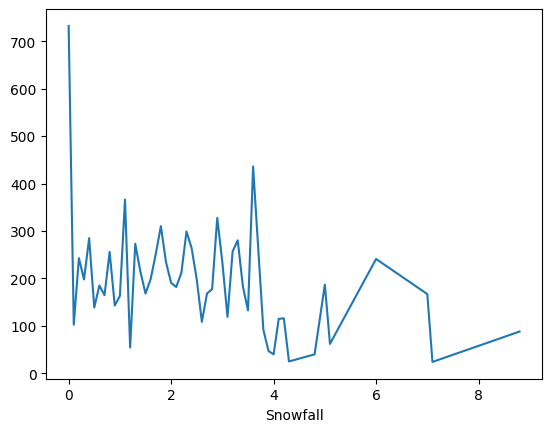

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()


* ***From the plot, it's noticeable that the amount of rented bikes is relatively low, particularly when the snowfall exceeds 4 cm. This observation indicates that there is a significant decrease in bike rentals during periods of heavy snowfall. The low bike rental counts during such weather conditions likely reflect the reduced inclination or ability of individuals to engage in biking activities in the presence of significant snow accumulation.***

<Axes: xlabel='Rainfall'>

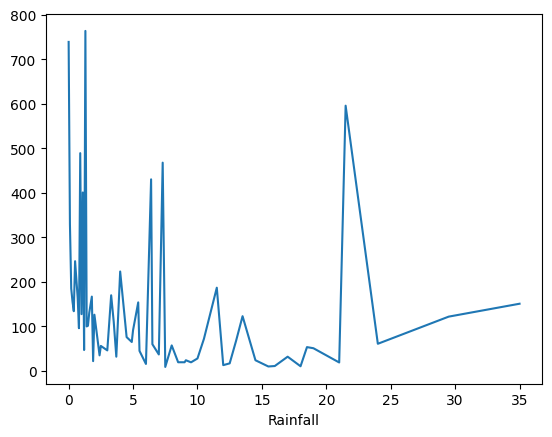

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()


* ***From the above plot, it's evident that even during periods of heavy rainfall, the demand for rented bikes remains high. For instance, there is a notable peak in rented bikes even when there is 20 mm of rain. This observation suggests that rainfall does not significantly deter individuals from renting bikes, indicating that biking remains a popular mode of transportation or leisure activity regardless of the weather conditions.***

<Axes: xlabel='Wind_speed'>

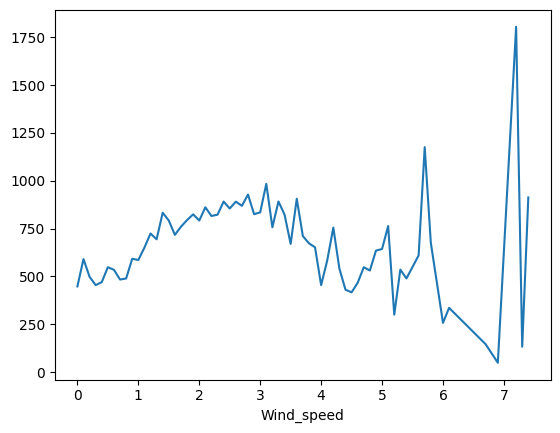

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

* ***From the plot above, it's apparent that the demand for rented bikes remains relatively consistent across different wind speeds. However, there is a notable increase in bike rentals when the wind speed reaches 7 m/s. This suggests that people enjoy riding bikes even during slightly windy conditions, as evidenced by the uptick in bike rentals at this wind speed.***

### **REGRESSION PLOT**

* ***Seaborn's regression plots serve as visual aids during exploratory data analysis, highlighting patterns within a dataset. These plots create regression lines between two parameters, allowing for the visualization of their linear relationships.***

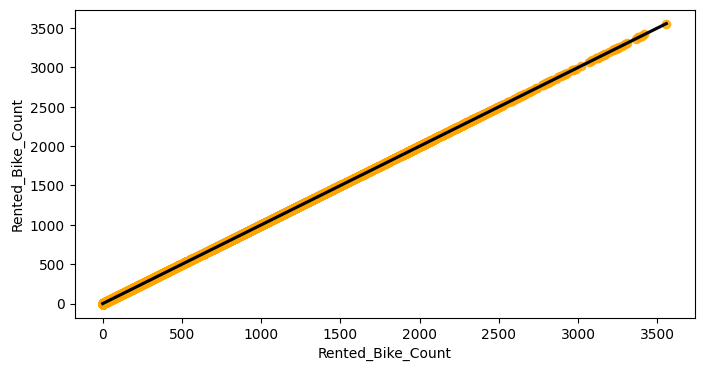

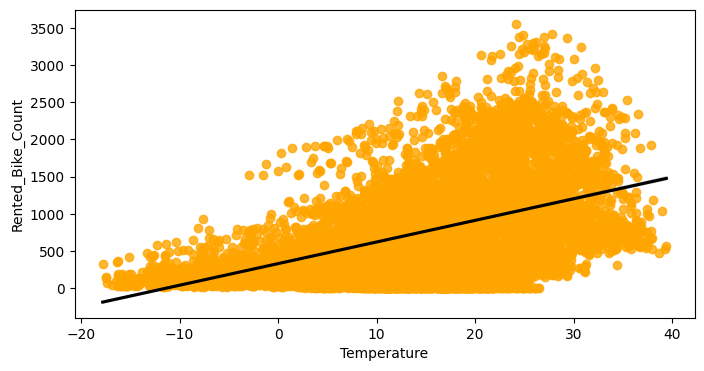

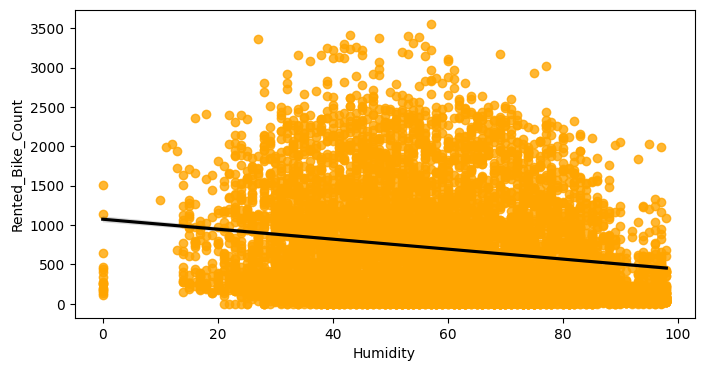

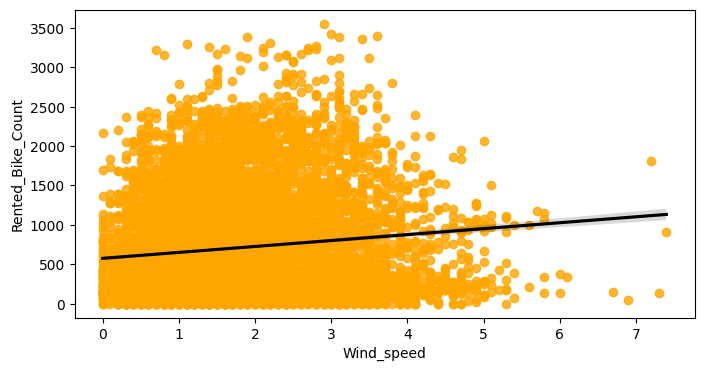

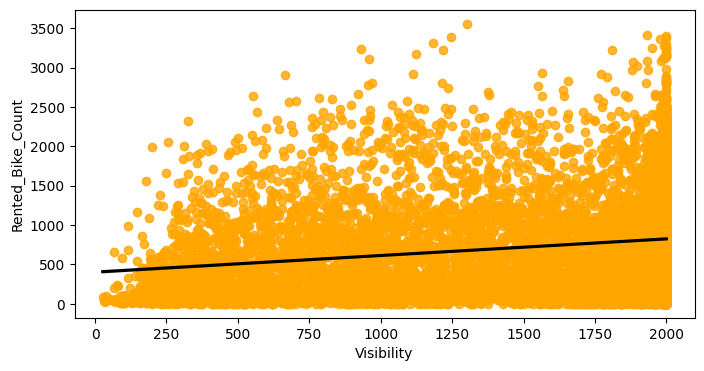

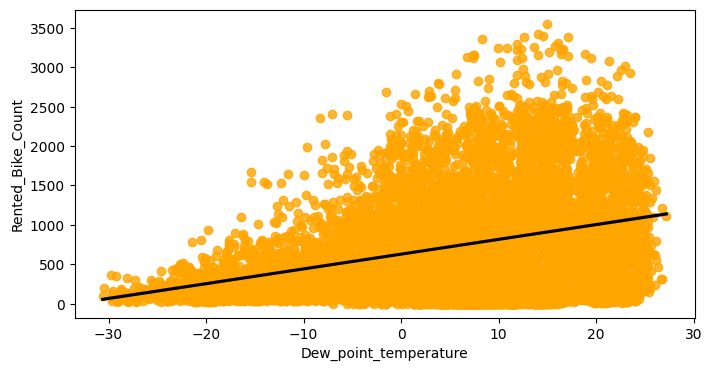

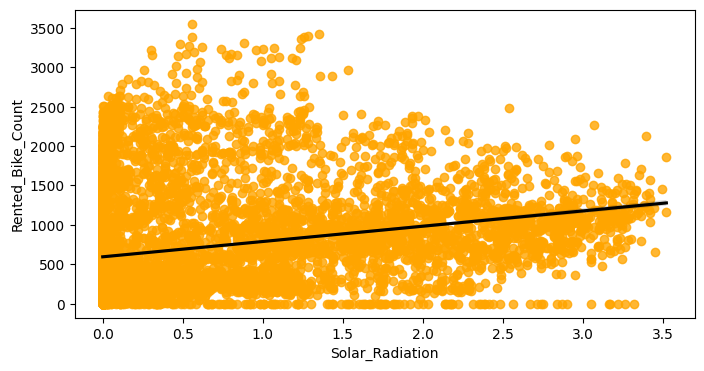

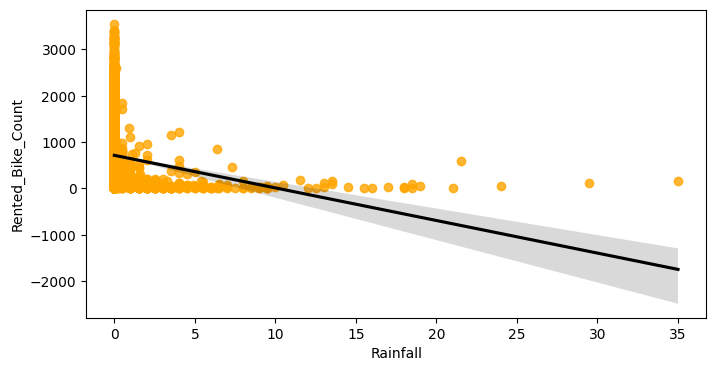

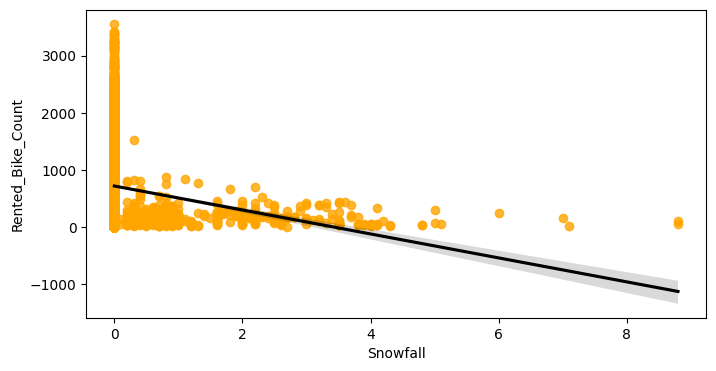

In [ ]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

* ***In the regression plot above, several numerical features exhibit distinct relationships with the target variable, "Rented Bike Count." Specifically, "Temperature," "Wind Speed," "Visibility," "Dew Point Temperature," and "Solar Radiation" show a positive correlation with the target variable, indicating that the count of rented bikes increases with an increase in these features. Conversely, "Rainfall," "Snowfall," and "Humidity" demonstrate a negative relationship with the target variable, implying that the rented bike count decreases as these features increase.***

##**Normalise Rented_Bike_Count column data**

* ***Data normalization, also known as data pre-processing, is a fundamental aspect of data mining. It involves transforming the source data into a different format to facilitate effective data processing. The primary objective of data normalization is to minimize or eliminate duplicated data, thereby enhancing the efficiency and accuracy of data analysis processes.***

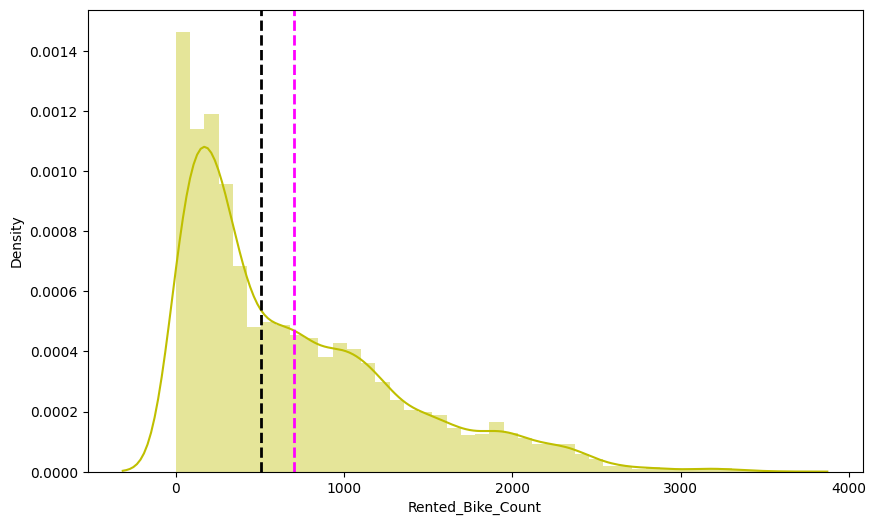

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The graph indicates that the "Rented Bike Count" exhibits moderate right skewness. Given that linear regression assumes the normal distribution of the dependent variable, it's essential to take steps to normalize it for accurate modeling.***

**Finding Outliers and treatment**

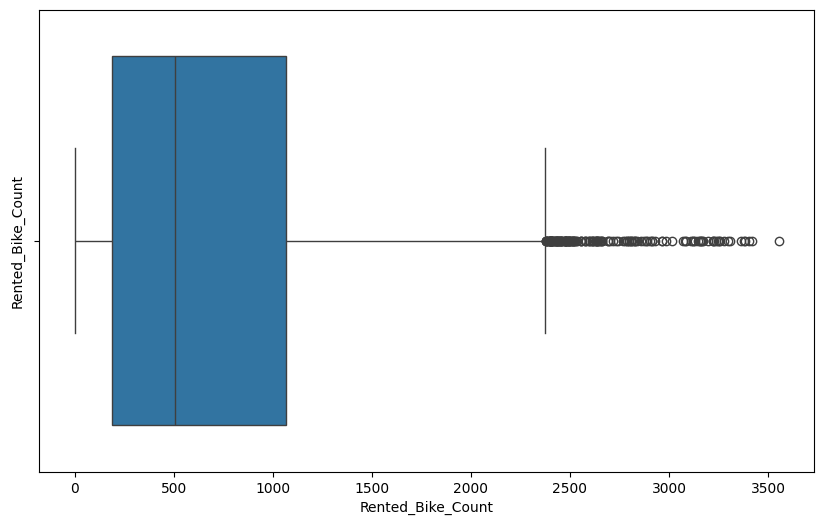

In [ ]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

In [ ]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4



We have employed outlier treatment techniques on the dataset, replacing outliers with the maximum values.

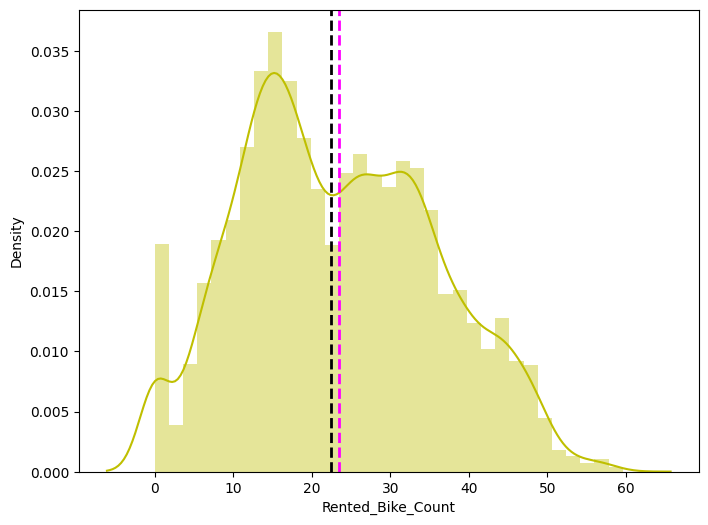

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* ***Applying the square root transformation to the skewed "Rented Bike Count" variable has resulted in an almost normal distribution.***

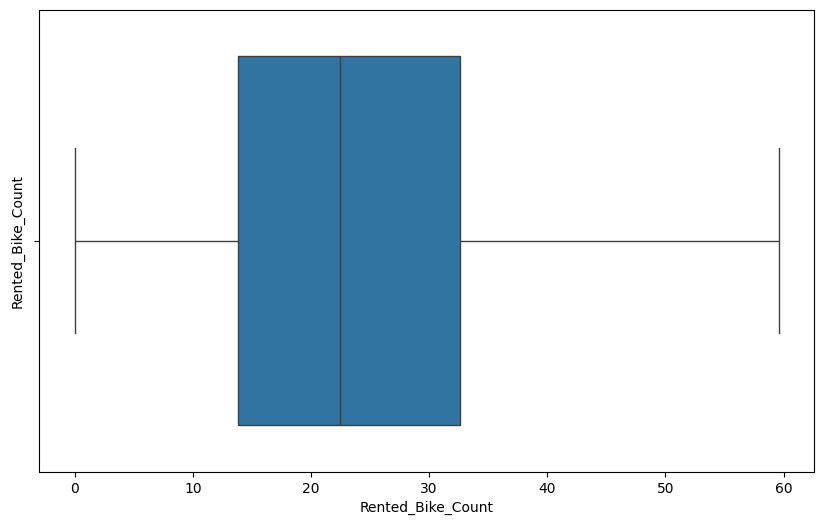

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

* ***After applying the square root transformation to the "Rented Bike Count" column, we observe that there are no outliers present.***

In [ ]:
bike_df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.131549,0.199280,0.379788,0.265658,-0.174224,-0.160917
Temperature,0.538558,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,-0.199780,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,0.131549,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,0.199280,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,0.379788,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,0.265658,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,-0.174224,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,-0.160917,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


##**Checking of Correlation between variables**

###Checking in OLS Model

**Ordinary Least Squares (OLS) regression is a statistical technique used to estimate the relationship between one or more independent variables and a dependent variable.**

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:48:56   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **The R-squared and adjusted R-squared values are close to each other, indicating that around 40% of the variance in the Rented Bike count is explained by the model.**

* **For the F statistic, the p-value is less than 0.05 at the 5% level of significance, suggesting that the model is statistically significant.**

* **However, the p-values of the dew point temperature and visibility variables are very high, indicating that they are not statistically significant.**

* **The Omnibus test indicates that there is skewness in the residuals, as the value of the test is high.**

* **The large condition number suggests the presence of strong multicollinearity or other numerical problems in the model.**

* **The Durbin-Watson test suggests the presence of positive autocorrelation among the variables, as the value is less than 0.5.**

In [ ]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,NaN,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,NaN,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,NaN,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,NaN,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,NaN,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,NaN,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


* ***From the OLS model, we observe a high correlation between the 'Temperature' and 'Dew_point_temperature' variables. To address multicollinearity, we need to drop one of them. By examining the (P>|t|) values from the table, we find that the 'Dew_point_temperature' variable has a higher p-value, indicating it is less significant. Therefore, we decide to drop the 'Dew_point_temperature' column.To visualize the correlation between variables more clearly, we will use a heatmap in the next step.***



###**Heatmap**

#### **A correlation heatmap is a graphical representation that displays the correlation matrix of a dataset. It provides a visual way to explore and understand the relationships between different variables by using colors to indicate the strength and direction of correlations.**

<Axes: >

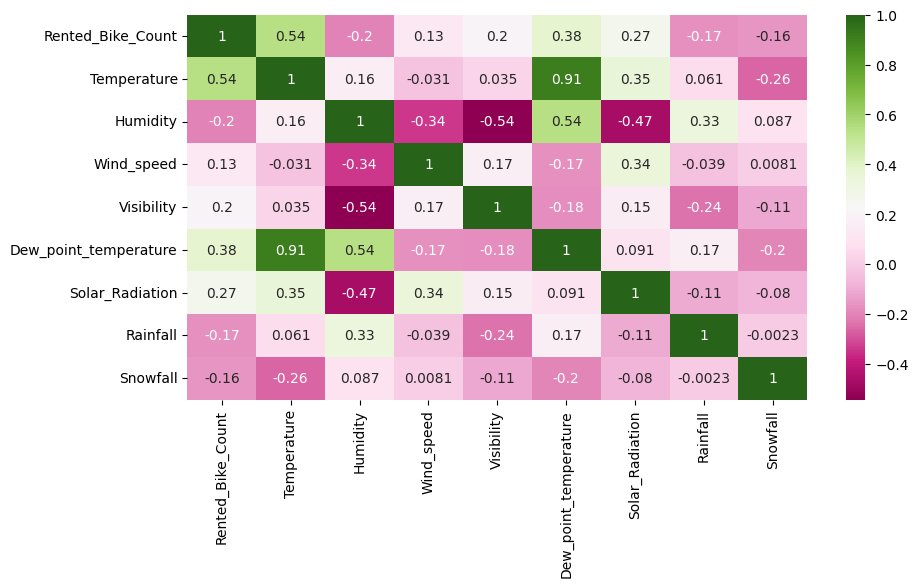

In [ ]:
#checking correlation using heatmap

plt.figure(figsize=(10,5))
sns.heatmap(bike_df.corr(),cmap='PiYG',annot=True)

**From the heatmap, it's evident that the most positively correlated variables with the rented bike count are**
* temperature
* dew point temperature
* solar radiation

**On the contrary, the most negatively correlated variables with the rented bike count are**
* humidity
* rainfall.

* ***From the correlation heatmap above, it's evident that there's a high positive correlation (0.91) between the columns 'Temperature' and 'Dew point temperature'. Since they share similar variations and dropping one won't significantly impact our analysis, we can safely remove the 'Dew point temperature(°C)' column.***

In [ ]:
# drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


## **Feature Engineering & Data Pre-processing**

## Create the dummy variables

**When dealing with datasets, it's common to encounter categorical values. To effectively utilize these categorical values in programming, we often create dummy variables.**

###One Hot Encoding

In [ ]:
#Assign all categorical features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

###one hot encoding

**One-hot encoding is a technique used to represent categorical data more effectively. In many machine learning algorithms, working with categorical data directly is not feasible, so the categories need to be converted into numerical values. This transformation is necessary for both input and output variables that are categorical. One-hot encoding provides a way to represent categorical variables as binary vectors, making them suitable for use in machine learning algorithms.**

In [ ]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


#**Model Training**

##**Train Test split for regression**

Before fitting any model, it is common practice to split the dataset into training and test sets. This ensures that a portion of the data is used to train the model, while another portion is reserved to evaluate its performance on unseen data. The split proportions can vary, with commonly used ratios like 80:20 for training and testing, but others such as 60:40, 70:30, or 75:25 may also be used. In this step, we will split our data into training and testing sets using the scikit-learn library.

In [ ]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [ ]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   int64  
 3   Wind_speed           8760 non-null   float64
 4   Visibility           8760 non-null   int64  
 5   Solar_Radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Hour_1               8760 non-null   uint8  
 9   Hour_2               8760 non-null   uint8  
 10  Hour_3               8760 non-null   uint8  
 11  Hour_4               8760 non-null   uint8  
 12  Hour_5               8760 non-null   uint8  
 13  Hour_6               8760 non-null   uint8  
 14  Hour_7               8760 non-null   uint8  
 15  Hour_8               8760 non-null   u

In [ ]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

Exactly, the mean squared error (MSE) is a crucial metric in regression analysis. It assesses the average squared difference between the actual and predicted values by the regression model. By squaring the errors, it penalizes larger discrepancies more severely, providing a comprehensive measure of the model's performance. A lower MSE signifies that the regression line closely fits the data points, indicating a more accurate forecast. Therefore, minimizing MSE is a primary objective when developing regression models.

MSE formula = (1/n) * Σ(actual – forecast)2

Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned}
​
  
* R
2
 =1−
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


# LINEAR REGRESSION


Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line.


Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple terms, it fits a best-fit line over the values of independent variables and the dependent variable. For a single variable, the formula is the same as a straight line equation with an intercept and slope:

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.


In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#check the score
reg.score(X_train, y_train)

0.791252853377143

In [ ]:
#check the coefficeint
reg.coef_

array([ 4.68899686e-01, -1.02733686e-01,  1.83389932e-02,  6.99377347e-04,
        9.18648101e-01, -5.11433440e+00, -2.17361057e-01, -2.18196972e+00,
       -5.03358899e+00, -7.07227656e+00, -9.68767884e+00, -9.28180883e+00,
       -4.17525131e+00,  1.98924368e+00,  7.41923561e+00,  1.62031037e+00,
       -3.02792590e+00, -3.03027527e+00, -1.90798462e+00, -2.28030752e+00,
       -2.40532863e+00, -1.09497887e+00,  7.19611360e-01,  4.50143285e+00,
        1.07240063e+01,  7.21392625e+00,  6.19079708e+00,  6.27641939e+00,
        5.13030344e+00,  1.46615648e+00, -9.03397290e+07,  4.78702031e+07,
       -7.87118106e+07,  3.41060308e+00,  2.83867043e+01, -6.19500042e-01,
        1.16279214e+07,  1.16279231e+07,  1.16279256e+07, -1.26582005e+08,
       -1.26582011e+08, -1.26582013e+08, -7.87118041e+07, -7.87118016e+07,
       -7.87118030e+07,  2.04432372e+00, -1.36518278e+00])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.145114805768415
RMSE : 5.669666198795871
MAE : 4.30109837175655
R2 : 0.791252853377143
Adjusted R2 : 0.7866725004867255


**Our training set's r2 score value is 0.79, indicating that our model can explain a significant portion of the data's variance. Let's save this information in a dataframe for future comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 31.21751120108675
RMSE : 5.587263301571419
MAE : 4.260531657874549
R2 : 0.8023787935913236
Adjusted R2 : 0.7980425673069129


**The test set's r2 score is 0.80, indicating that our linear model performs well on the data. Now, let's visualize our residuals to check for heteroscedasticity (unequal variance or scatter).**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

**Heteroscedasticity**

Heteroscedasticity occurs when the variance of the errors (residuals) is not consistent across different levels of the independent variable(s) in a regression model. This violates the assumption of linear regression that the variance of the errors should remain constant (homoscedastic) across all levels of the independent variable(s). A funnel-shaped plot, where the spread of residuals changes as the predicted values increase, indicates the presence of heteroscedasticity.

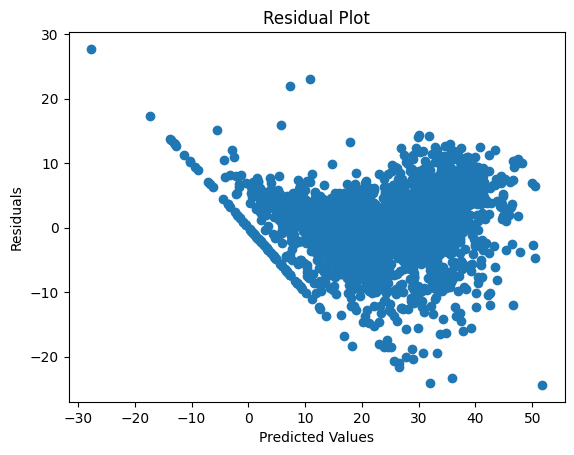

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

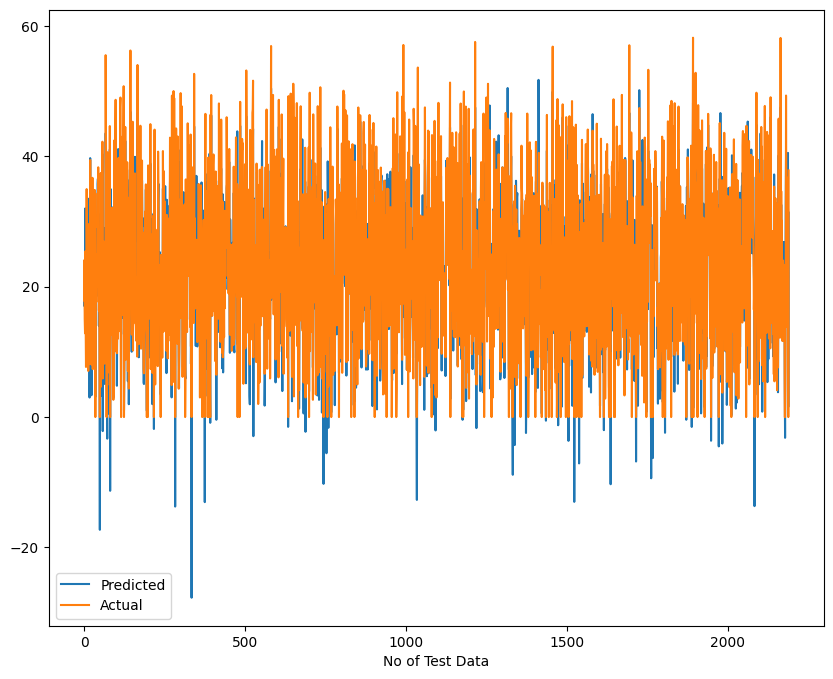

In [ ]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **Ridge and Lasso Regression**

* Ridge and Lasso Regression are regularization techniques aimed at mitigating overfitting, particularly in scenarios involving large datasets.
* They accomplish this by applying penalties to the regression function.


#**Lasso Regression**

Lasso regression is a method for linear regression models that performs shrinkage and variable selection. Its objective is to identify a subset of predictors that minimizes prediction error for a quantitative response variable. It utilizes Linear regression with L1 regularization.


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.38086483341841226 0.3983632039954085


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 92.6464586070881
RMSE : 9.625303039753508
MAE : 7.304643598875601
R2 : 0.3983632039954085
Adjusted R2 : 0.38516202313069525


**The training set's R2 score is 0.39, indicating that our model is not capturing much of the data variance. Let's save it in a dataframe for future comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 97.80255544932679
RMSE : 9.8895174528046
MAE : 7.505550890266117
R2 : 0.38086483341841226
Adjusted R2 : 0.3672797013785736


**The test set's R2 score is 0.38, indicating that our linear model is not performing well on the data.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

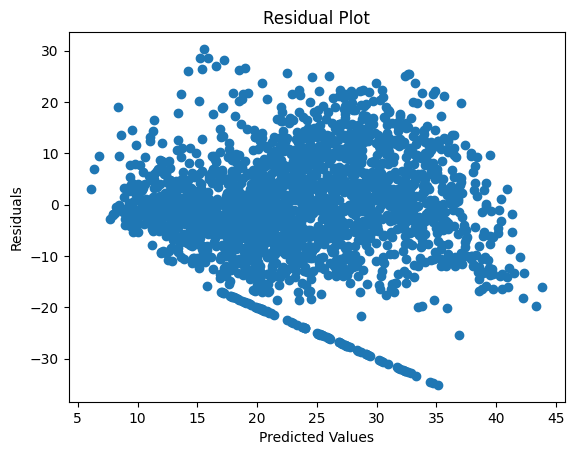

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

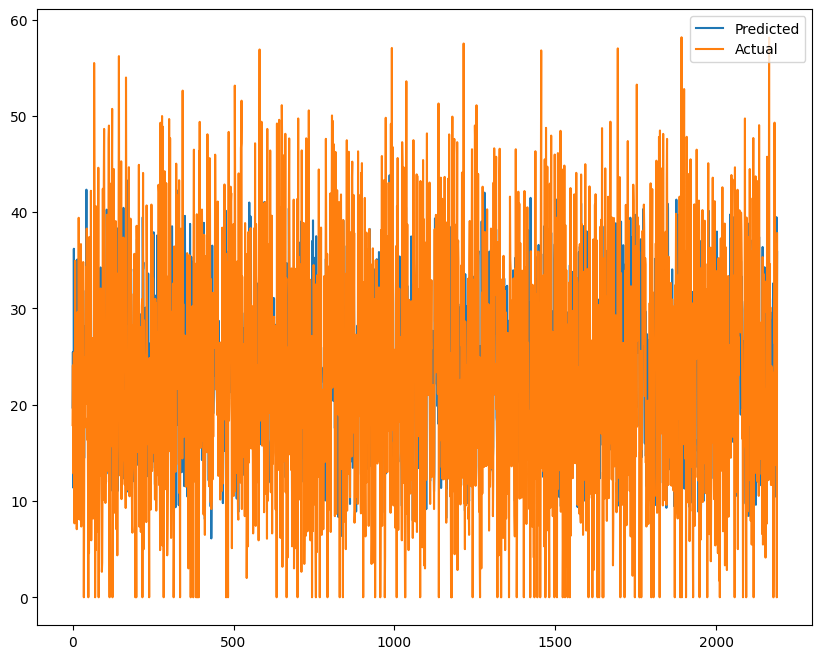

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RIDGE REGRESSION**

Ridge regression is a method used for estimating the coefficients of regression models, especially when the independent variables are highly correlated. It employs the linear regression model with the L2 regularization method.

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.7912527761772726

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
y_pred_train_ridge

array([20.62298584, 30.79728204, 19.9313908 , ..., 34.40392233,
       23.28141619, 22.22957588])

In [ ]:
y_pred_test_ridge

array([17.10269158, 23.09797634, 20.39407758, ..., 40.50590122,
        1.57892994, 31.35388445])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.145126693828864
RMSE : 5.6696672471873395
MAE : 4.301221643579305
R2 : 0.7912527761772726
Adjusted R2 : 0.786672421592927


**The train set's R-squared score is 0.79, indicating that our model captures most of the data variance. Let's store it in a dataframe for future comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 31.218732967563575
RMSE : 5.587372635466832
MAE : 4.260759424869219
R2 : 0.8023710592474951
Adjusted R2 : 0.79803466325526


**The test set's R-squared score is 0.80, indicating that our linear model performs well on the data. Now, let's visualize our residuals and check for heteroscedasticity (unequal variance or scatter).**


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

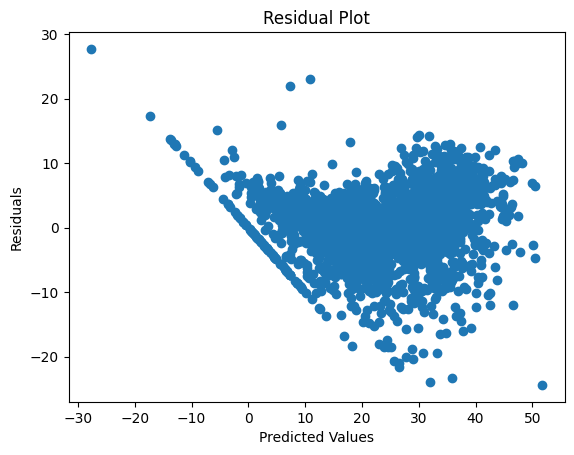

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

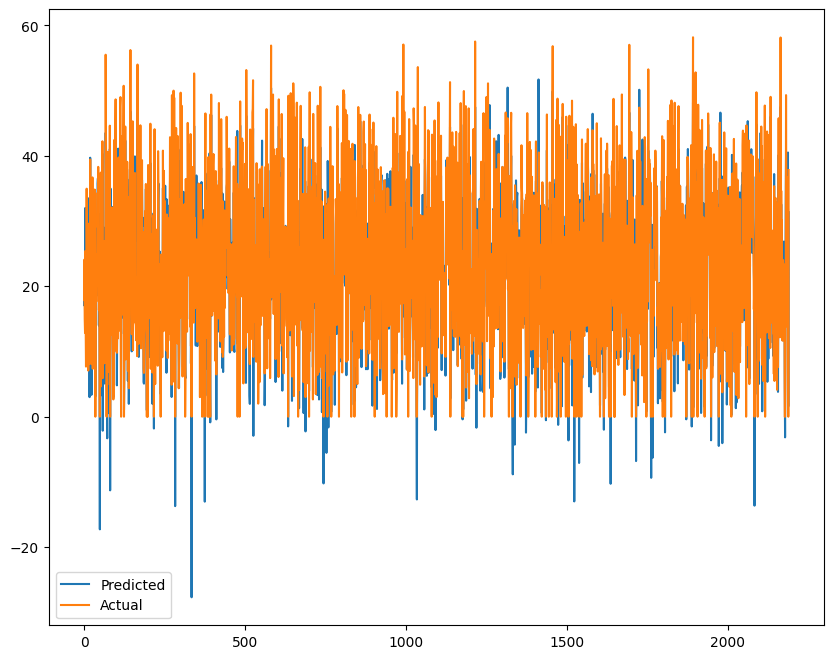

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **ELASTIC NET REGRESSION**

Elastic Net regression is a linear regression model that integrates both L1 (Lasso) and L2 (Ridge) regularization penalties to address the drawbacks of each approach.

This model introduces two hyperparameters, alpha and l1_ratio, which regulate the magnitude of the L1 and L2 penalties, respectively. Elastic Net regression is valuable for datasets with high dimensionality and multicollinearity among features.

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.641910450609957

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
print(y_pred_train_en)
print(y_pred_test_en)

[15.68077567 31.24309653 17.3320067  ... 32.50762556 22.63580595
 19.21383635]
[19.01670529 24.63235562 18.23867345 ... 39.95161758 18.30435149
 32.95386409]


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 55.14245278133264
RMSE : 7.425796440876402
MAE : 5.653172410366239
R2 : 0.641910450609957
Adjusted R2 : 0.6340532102638636


**The train set's r2 score value is 0.64, indicating that our model captures a significant portion of the data variance. Let's store this information in a dataframe for future comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 57.773040965512614
RMSE : 7.600857909835745
MAE : 5.765579824382158
R2 : 0.6342700742554702
Adjusted R2 : 0.6262451879296098


**The test set's r2_score is 0.63, indicating that our linear model performs well on the data. Now, let's visualize our residuals to check for heteroscedasticity, which refers to unequal variance or scatter.**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

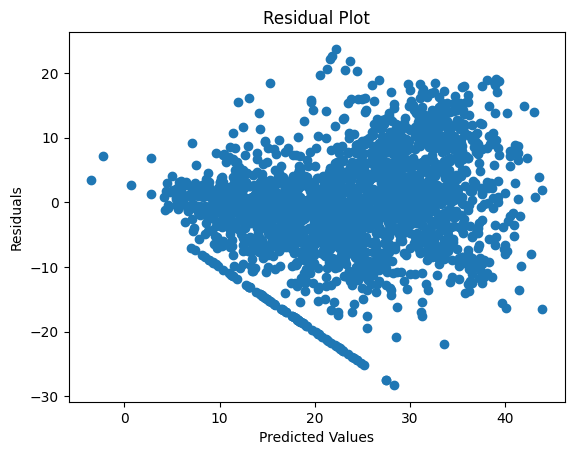

In [ ]:
### Heteroscadacity- Residual plo
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

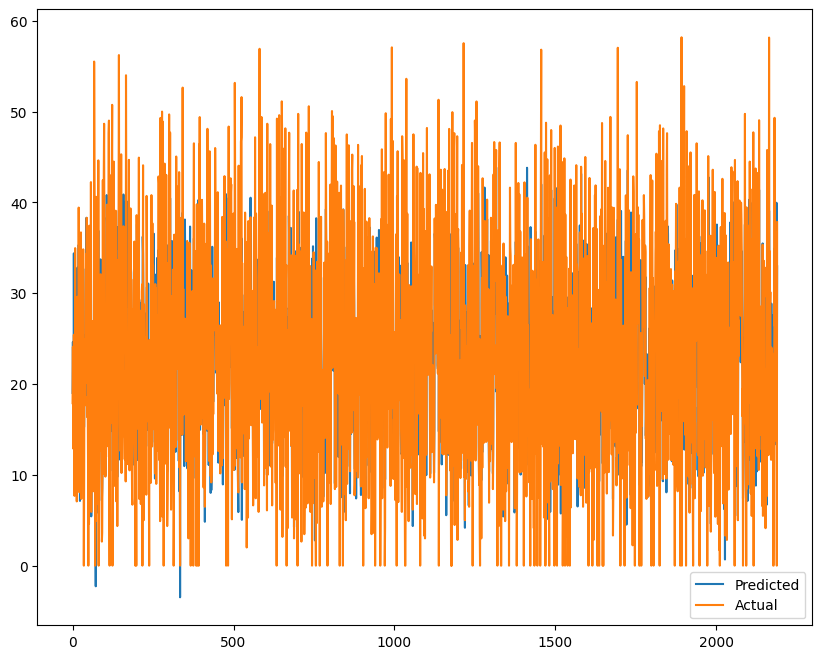

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE**

---


A decision tree is a supervised machine learning algorithm used for classification and regression tasks. It recursively splits the data into subsets based on attribute values, leading to decision rules for classifying or predicting outcomes for new data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
print(y_pred_train_d)
print(y_pred_test_d)

[29.5322553  34.60503795 15.09685373 ... 38.88360293 24.1726719
 21.59775021]
[24.1726719  20.50326713 18.09443932 ... 38.88360293  0.
 33.34115661]


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.6818564577253401
MSE : 48.99114003033272
RMSE : 6.999367116413649
MAE : 5.119391807667808
R2 : 0.6818564577253401
Adjusted R2 : 0.6748757170685198


**The training set's R-squared score value is 0.68, indicating that our model can capture a significant portion of the data variance. Let's store this information in a dataframe for future comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 56.71306992084729
RMSE : 7.5308080523173135
MAE : 5.473037046459444
R2 : 0.6409801785701836
Adjusted R2 : 0.6331025260924986


**The test set's R-squared score is 0.64, indicating that our linear model performs well on the data. We will now visualize the residuals to check for heteroscedasticity, which refers to unequal variance or scatter in the residuals.**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

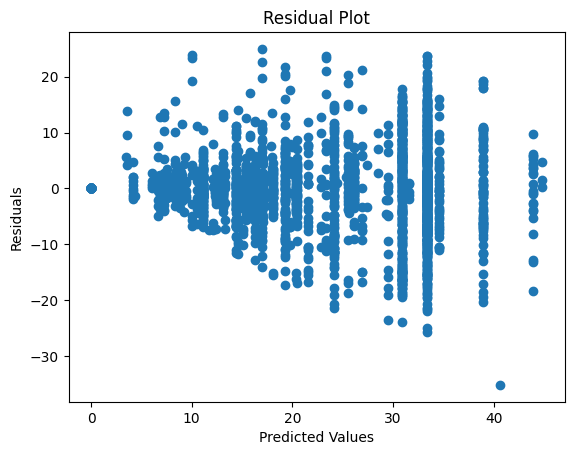

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

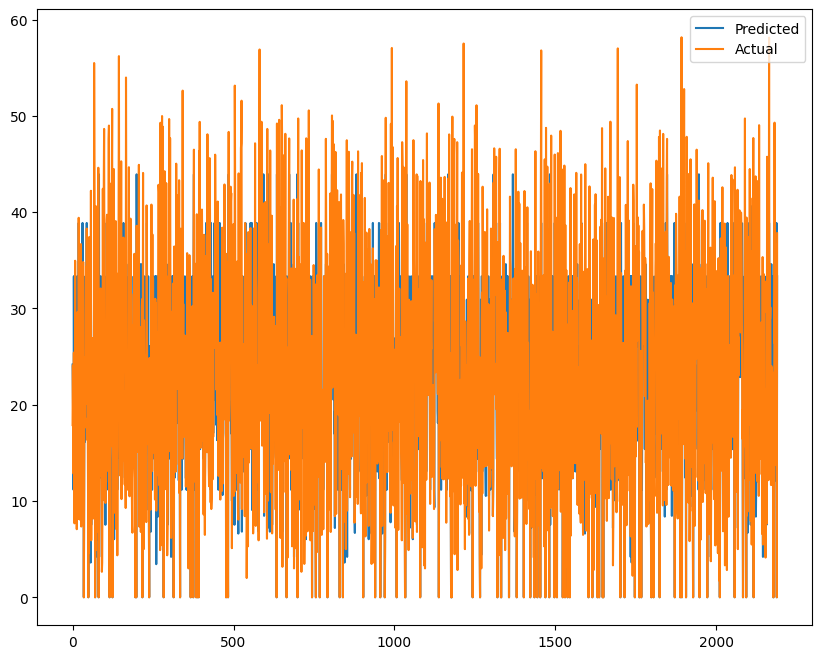

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9896669414055058
MSE : 1.591194707034032
RMSE : 1.2614256644899975
MAE : 0.8033981286785917
R2 : 0.9896669414055058
Adjusted R2 : 0.9894402122953558


**The training set's R-squared score is 0.98, indicating that our model captures most of the data variance. We will save this information in a dataframe for future comparisons.**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.579869375201298
RMSE : 3.546811155841441
MAE : 2.195916244031605
R2 : 0.9203636399334647
Adjusted R2 : 0.9186162501467574


**The test set's R-squared score is 0.92, indicating that our linear model is performing well on the data. Now, let's visualize our residuals to check for heteroscedasticity (unequal variance or scatter).**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

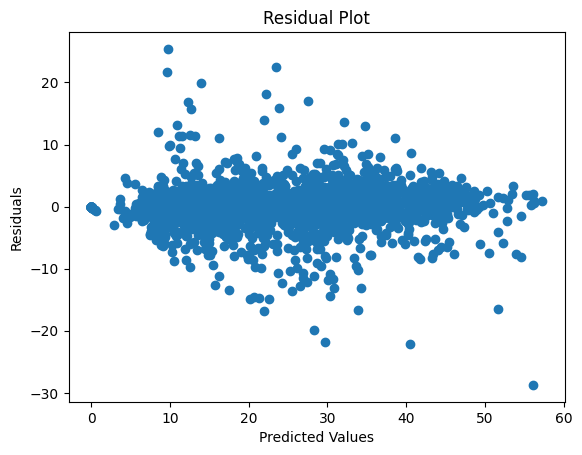

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
rf_model.feature_importances_

array([3.13372236e-01, 1.55790003e-01, 1.17150525e-02, 1.23316398e-02,
       3.10736115e-02, 3.62441706e-02, 1.32413664e-03, 4.55036675e-03,
       1.23757764e-02, 1.95256181e-02, 2.86364490e-02, 2.47829648e-02,
       7.94199561e-03, 4.28926248e-03, 1.42326598e-02, 1.15014490e-03,
       2.24417272e-03, 1.20034316e-03, 3.12835966e-04, 3.21284356e-04,
       3.65834984e-04, 1.47672356e-03, 3.68881773e-03, 1.03265293e-02,
       3.15168859e-02, 1.76151670e-02, 1.26130770e-02, 1.29392389e-02,
       1.03186018e-02, 4.29885945e-03, 3.77751824e-03, 9.49724179e-04,
       8.67059729e-03, 3.91027248e-03, 1.52078561e-01, 2.91433341e-04,
       4.03351717e-03, 1.34719221e-03, 1.48901652e-03, 2.28598200e-03,
       9.10205548e-04, 2.57526370e-03, 8.80537715e-04, 2.89992182e-03,
       5.29344203e-03, 7.54350873e-04, 1.92780045e-02])

## FEATURES STORED

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
34,Functioning_Day_Yes,0.15
5,Rainfall,0.04
10,Hour_4,0.03
4,Solar_Radiation,0.03
24,Hour_18,0.03
25,Hour_19,0.02
11,Hour_5,0.02
46,weekdays_weekend_1,0.02


In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

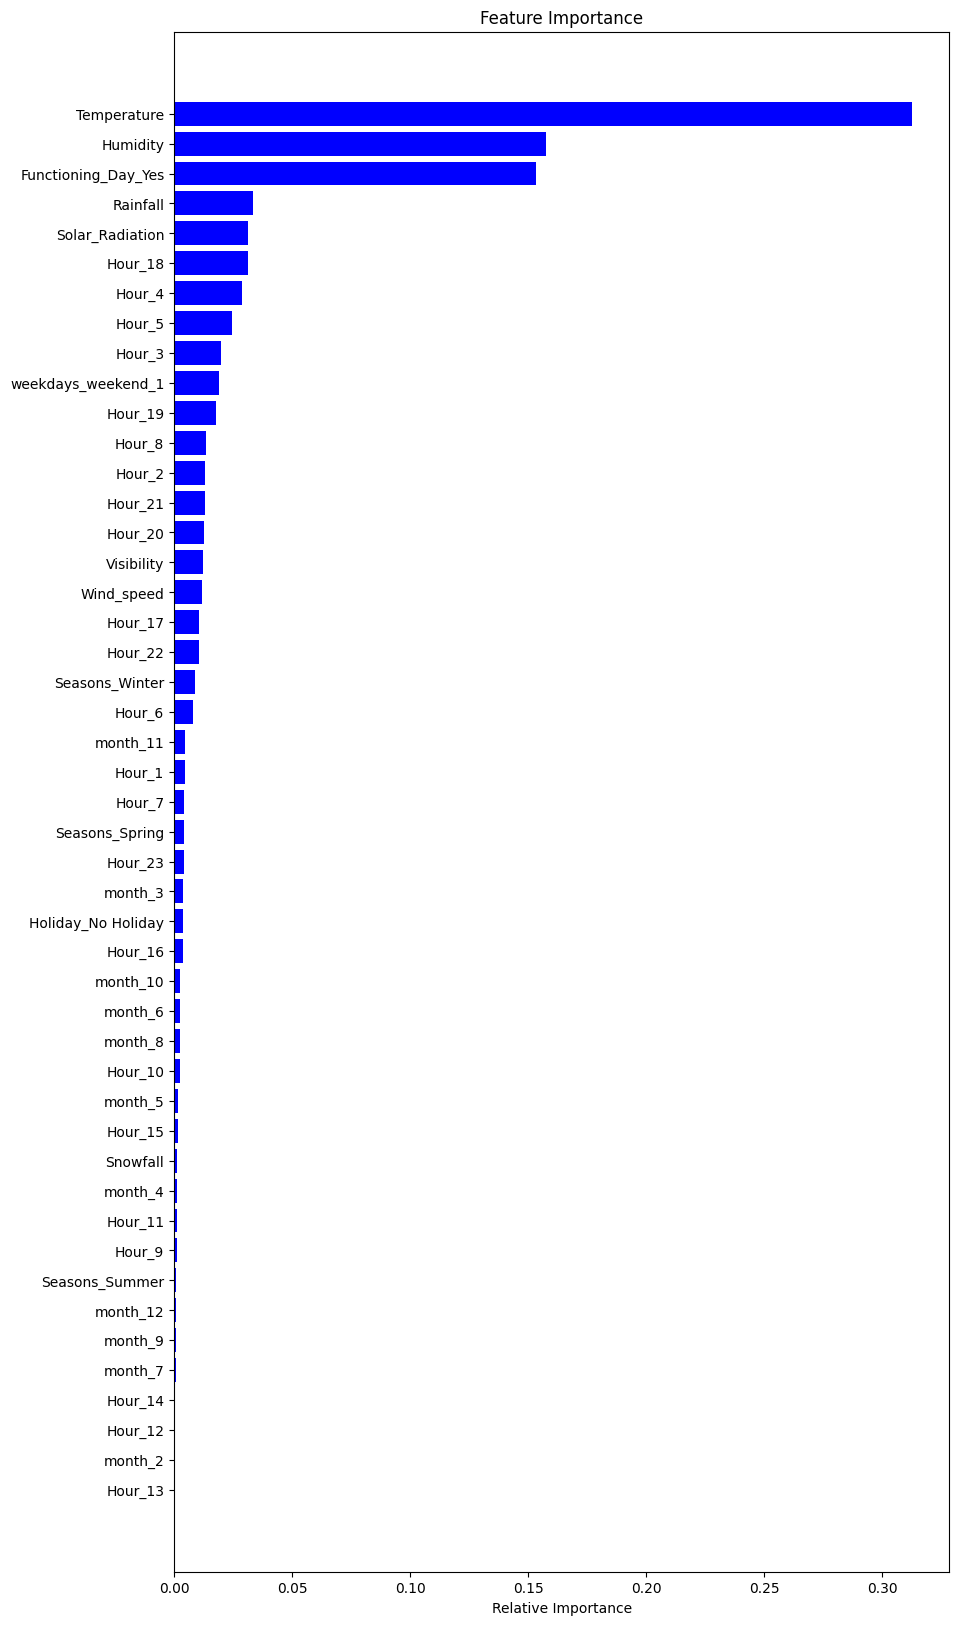

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8760091795221207
MSE : 19.09343061021
RMSE : 4.369603026615804
MAE : 3.3013097059201097
R2 : 0.8760091795221207
Adjusted R2 : 0.8732885592782083


**Looks like our train set's r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 21.5162904041049
RMSE : 4.638565554576641
MAE : 3.496691771295391
R2 : 0.8637919839378287
Adjusted R2 : 0.860803292642347


**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

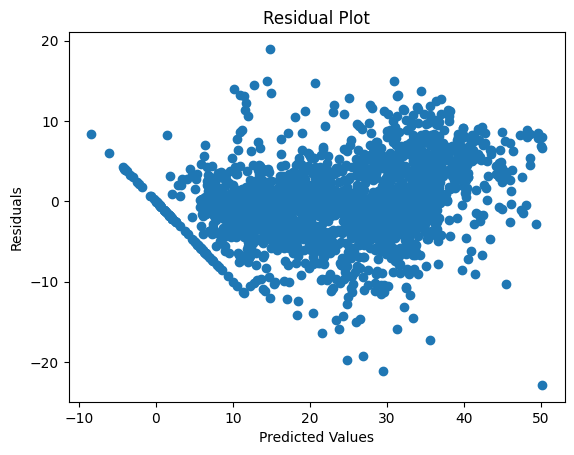

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
gb_model.feature_importances_

array([3.22871921e-01, 1.29059178e-01, 2.36316095e-04, 5.05306124e-04,
       4.89603250e-02, 6.53942926e-02, 9.41346905e-06, 3.54528297e-04,
       5.55116789e-03, 1.47540181e-02, 2.71652952e-02, 2.07826255e-02,
       5.53615753e-03, 4.21330488e-05, 1.03746894e-02, 0.00000000e+00,
       3.12010802e-03, 1.49189245e-03, 0.00000000e+00, 0.00000000e+00,
       4.65071042e-05, 0.00000000e+00, 1.92297365e-04, 7.41868419e-03,
       2.99824877e-02, 1.76286106e-02, 1.26241734e-02, 1.52003098e-02,
       1.26692962e-02, 3.78557652e-04, 2.35772283e-04, 4.18768111e-05,
       3.26950228e-02, 1.96041409e-03, 1.75602474e-01, 0.00000000e+00,
       1.48757418e-03, 1.02006460e-04, 5.02728704e-04, 4.28464592e-03,
       0.00000000e+00, 2.68486045e-03, 0.00000000e+00, 6.41893200e-03,
       4.85755587e-03, 7.62177268e-04, 1.60136680e-02])

## FEATURES STORED

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.13
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.05


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning_Day_Yes,0.18
1,Humidity,0.13
5,Rainfall,0.07
4,Solar_Radiation,0.05
32,Seasons_Winter,0.03
24,Hour_18,0.03
10,Hour_4,0.03
11,Hour_5,0.02
27,Hour_21,0.02


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

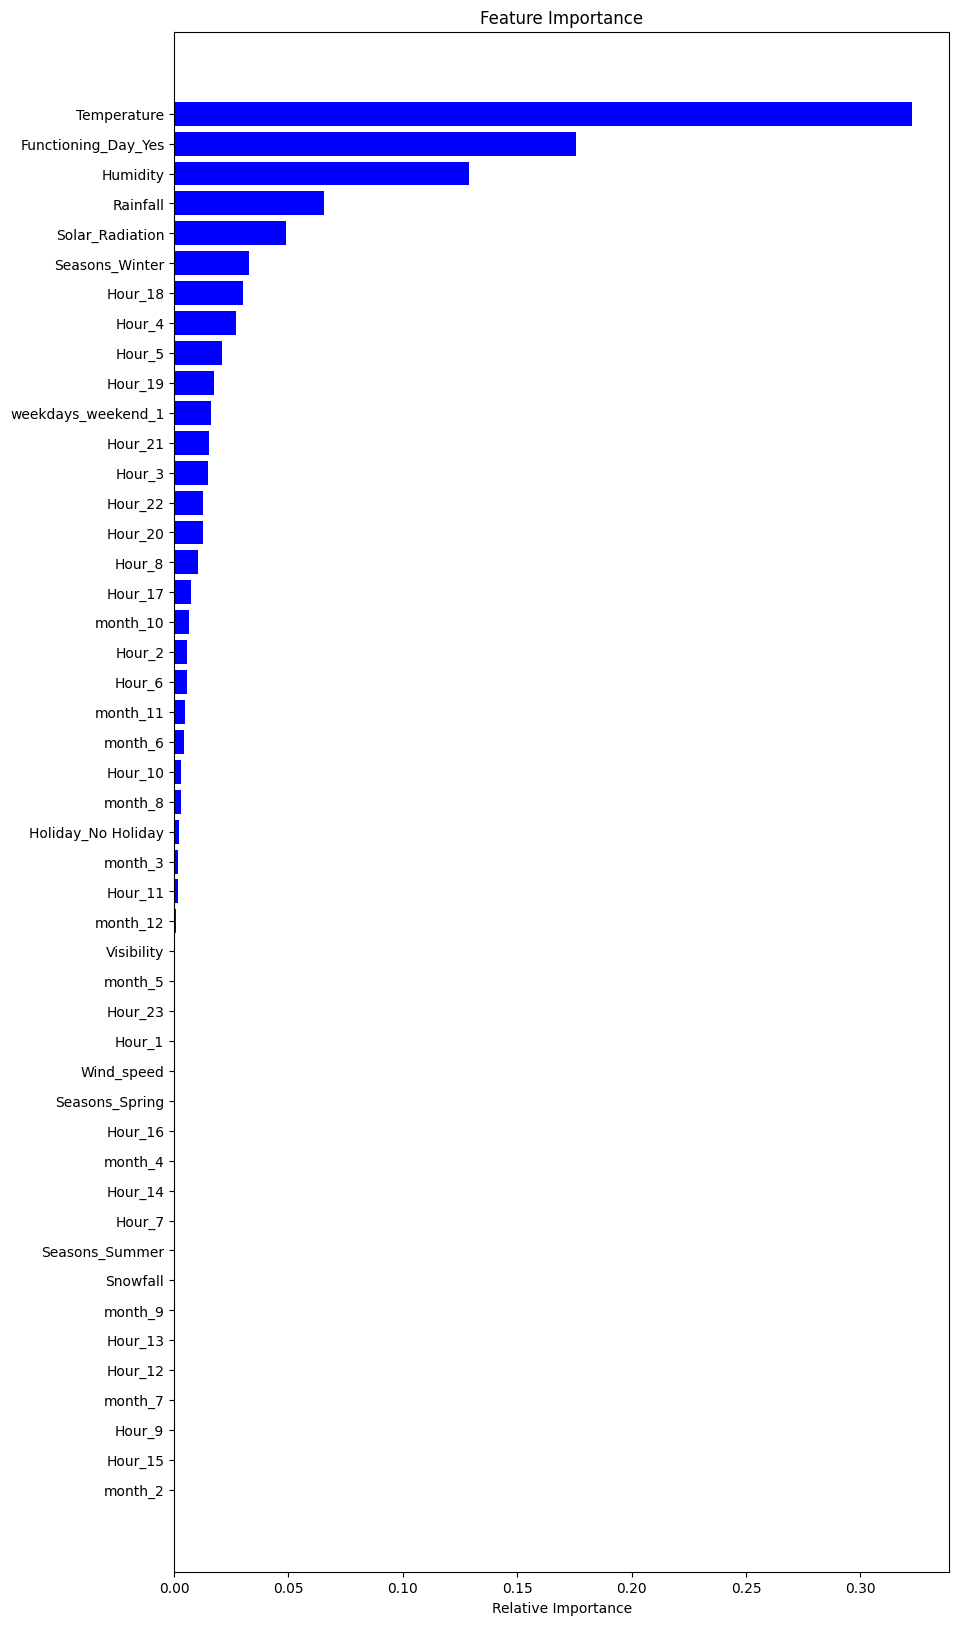

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**

Before proceeding to try other models, let's attempt to tune some hyperparameters to see if we can improve the performance of our model.

Hyperparameter tuning involves selecting the optimal values for certain parameters of a learning algorithm before the actual learning process begins. These parameters, known as hyperparameters, can significantly impact the performance of machine learning models. Tuning these hyperparameters is crucial for optimizing the model's performance.

<b> Using GridSearchCV


GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

##**Gradient Boosting Regressor with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

### **Importing Gradient Boosting Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
param_dict = {'learning_rate': [0.1, 0.01],
              'n_estimators': [50, 100],
              'max_depth': [3, 5]}

gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=param_dict,
                       cv=3, verbose=2, n_jobs=-1)

gb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=5)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.940843120722907
MSE : 9.109607995498804
RMSE : 3.018212715415997
MAE : 2.1783965311680302
R2 : 0.940843120722907
Adjusted R2 : 0.9395450939600576


**Looks like our train set's r2 score value is 0.94 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 13.56547316543138
RMSE : 3.683133606785312
MAE : 2.6337779751580546
R2 : 0.914124314549337
Adjusted R2 : 0.9122400207976185


Hyperparameter tuning has indeed yielded better results, with an R-squared value of 0.91 on the test set and lower values for mean absolute error (MAE) and root mean squared error (RMSE). Overall, the model exhibits good performance.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

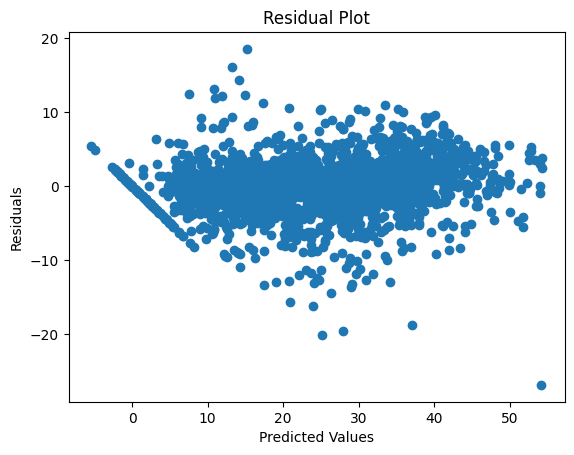

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
gb_optimal_model.feature_importances_

array([3.10679230e-01, 1.56750153e-01, 2.05566369e-03, 4.06095901e-03,
       3.57808033e-02, 4.42422364e-02, 9.26589410e-04, 1.00132162e-03,
       6.79980182e-03, 1.63250195e-02, 2.94744203e-02, 2.38019384e-02,
       5.80604129e-03, 5.24439169e-03, 1.21096207e-02, 1.13790751e-04,
       3.49758696e-03, 1.57374676e-03, 1.44499200e-04, 8.15950195e-05,
       6.88381029e-05, 4.31605611e-05, 1.44818180e-03, 8.34652838e-03,
       3.04434622e-02, 1.88996010e-02, 1.26614174e-02, 1.56645271e-02,
       1.03007874e-02, 1.55299811e-03, 1.65437354e-03, 2.34402889e-04,
       2.22571668e-02, 3.97283149e-03, 1.63367087e-01, 1.09013918e-05,
       1.47984404e-03, 4.18773803e-04, 1.01836168e-03, 4.24123849e-03,
       1.09324524e-03, 5.53841210e-03, 1.41371596e-04, 7.52514302e-03,
       5.61665922e-03, 1.05533600e-03, 2.04759407e-02])

## FEATURES STORED

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.04


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
34,Functioning_Day_Yes,0.16
1,Humidity,0.16
4,Solar_Radiation,0.04
5,Rainfall,0.04
24,Hour_18,0.03
10,Hour_4,0.03
11,Hour_5,0.02
32,Seasons_Winter,0.02
27,Hour_21,0.02


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

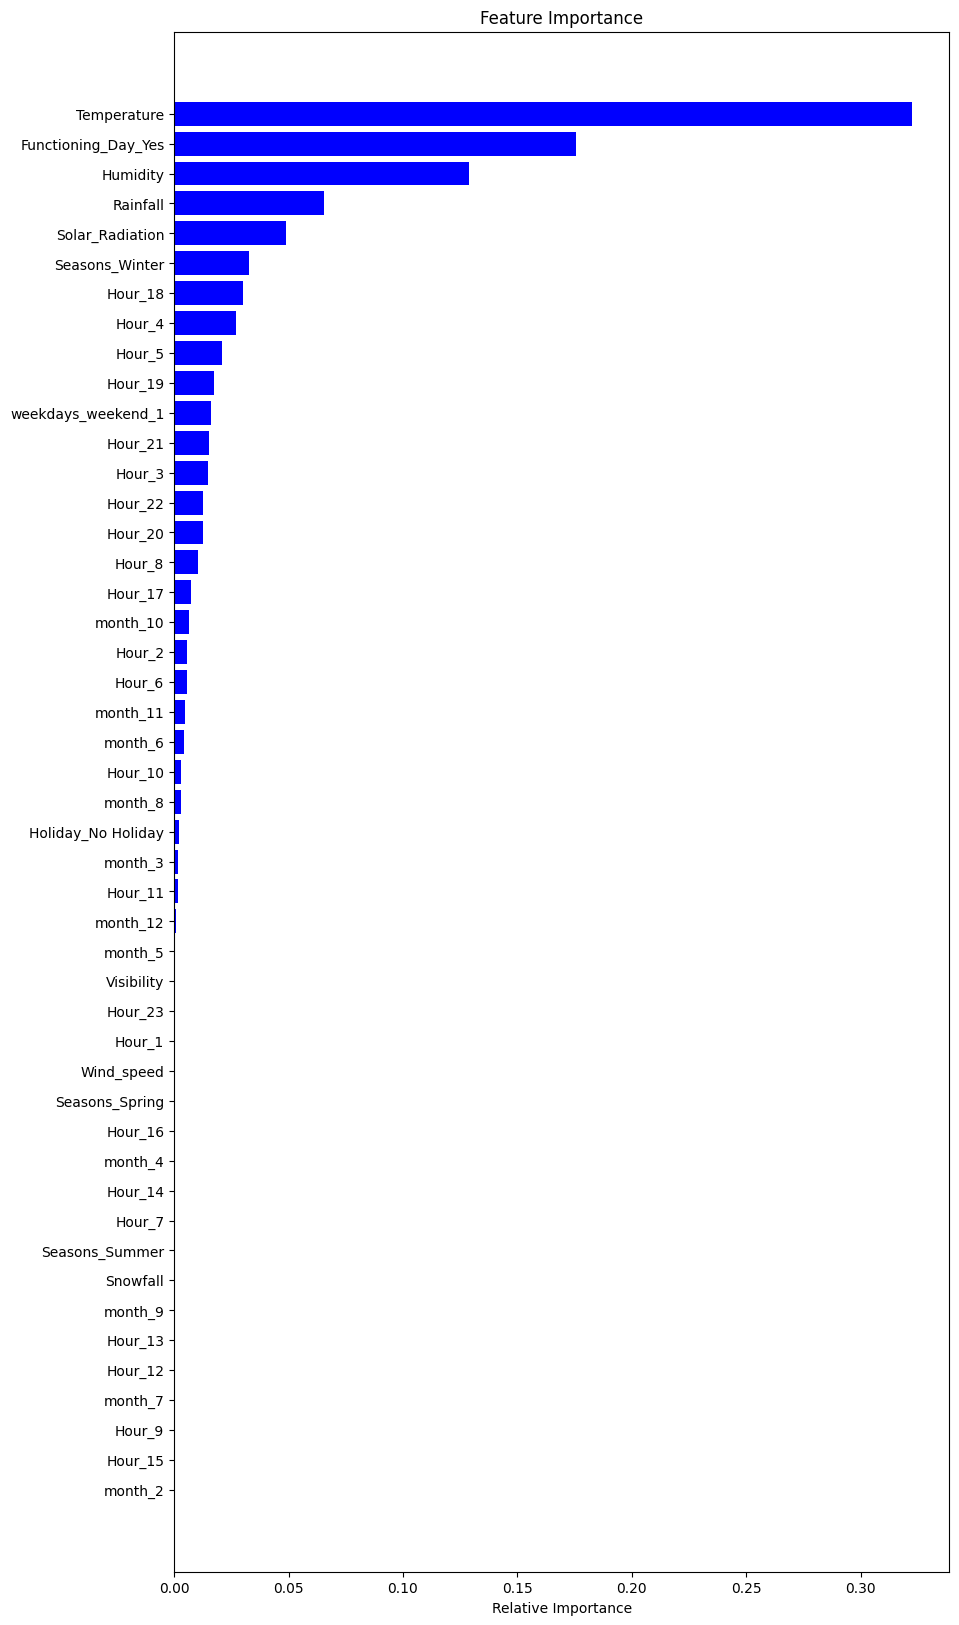

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Conclusion**

During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessary. We then examined the categorical variables and removed those with a majority of one class. We also studied the numerical variables, calculated their correlations, distributions, and their relationships with the dependent variable. Additionally, we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.

Subsequently, we employed 7 machine learning algorithms including Linear Regression, Lasso, Ridge, Elastic Net, Decision Tree, Random Forest, and Gradient Booster. We also performed hyperparameter tuning to enhance the performance of our models. The evaluation of our models resulted in the following findings:

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.301  32.145  5.670   
             1                Lasso regression   7.305  92.646  9.625   
             2                Ridge regression   4.301  32.145  5.670   
             3          Elastic net regression   5.653  55.142  7.426   
             4        Dicision tree regression   5.119  48.991  6.999   
             5        Random forest regression   0.803   1.591  1.261   
             6    Gradient boosting regression   3.301  19.093  4.370   
             7  Gradient Boosting gridsearchcv   2.178   9.110  3.018   
Test set     0               Linear regression   4.261  31.218  5.587   
             1                Lasso regression   7.506  97.803  9.890   
             2                Ridge regression   4.261  31.219  5.587   
             3      Elastic net regression Test  5.766  57.773  7.601   
             4        Dicision tree regression   5.473  56.713  7.531   
             5        Random forest regression   2.196  12.580  3.547   
             6    Gradient boosting regression   3.497  21.516  4.639   
             7  Gradient Boosting gridsearchcv   2.634  13.565  3.683   

                R2_score  Adjusted R2  
Training set 0     0.791         0.79  
             1     0.398         0.39  
             2     0.791         0.79  
             3     0.642         0.63  
             4     0.682         0.67  
             5     0.990         0.99  
             6     0.876         0.87  
             7     0.941         0.94  
Test set     0     0.802         0.80  
             1     0.381         0.37  
             2     0.802         0.80  
             3     0.634         0.63  
             4     0.641         0.63  
             5     0.920         0.92  
             6     0.864         0.86  
             7     0.914         0.91

We trained a model to predict the number of rented bike counts given weather conditions. First, we conducted Exploratory Data Analysis on the dataset. We looked for null values, which were not found, and addressed outliers appropriately. We also performed correlation analysis to extract the important and relevant feature set, followed by feature engineering.

The Gradient Boosting gridsearchcv model showed promising results with an R2 score of 0.91, indicating its suitability for solving this problem. Key driving factors for bike rental demand include temperature, functioning day (yes), humidity, rainfall, and solar radiation.

We observed peaks in bike demand around 8-9 AM in the morning and 6-7 PM in the evening. Additionally, bike demand is higher in summer compared to winter, and clear days see higher demand than snowy or rainy days. Specifically, temperatures ranging from 22 to 25°C tend to have higher demand for bikes.

While the current analysis offers valuable insights, it's crucial to acknowledge that the dataset is time-dependent, and factors like temperature, windspeed, and solar radiation can vary over time. Consequently, there might be instances where the model's performance falters. Given the ever-evolving nature of the machine learning field, it's imperative to stay abreast of the latest developments and be equipped to address unforeseen circumstances. A solid grasp of machine learning concepts will undoubtedly confer an advantage in staying ahead in the future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***